<a href="https://colab.research.google.com/github/chrishunt11/Project-2/blob/main/Prediction_of_Home_Wins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Home Wins NBA
Name: Christopher Hunt

### Importing data

In [133]:
import pandas as pd
fname = '/content/drive/MyDrive/Bootcamp: Coding Dojo/Projects/Project 2/Data/game.csv'
df = pd.read_csv(fname)
pd.set_option('display.max_columns',100)
df = pd.read_csv(fname, index_col='game_id')
df.head(5)

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_date,matchup_home,wl_home,min,fgm_home,fga_home,fg_pct_home,fg3m_home,fg3a_home,fg3_pct_home,ftm_home,fta_home,ft_pct_home,oreb_home,dreb_home,reb_home,ast_home,stl_home,blk_home,tov_home,pf_home,pts_home,plus_minus_home,video_available_home,team_id_away,team_abbreviation_away,team_name_away,matchup_away,wl_away,fgm_away,fga_away,fg_pct_away,fg3m_away,fg3a_away,fg3_pct_away,ftm_away,fta_away,ft_pct_away,oreb_away,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
game_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
24600001,21946,1610610035,HUS,Toronto Huskies,1946-11-01 00:00:00,HUS vs. NYK,L,0,25.0,NaN,NaN,NaN,NaN,NaN,16.0,29.0,0.552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,-2,0,1610612752,NYK,New York Knicks,NYK @ HUS,W,24.0,NaN,NaN,NaN,NaN,NaN,20.0,26.0,0.769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.0,2,0,Regular Season
24600003,21946,1610610034,BOM,St. Louis Bombers,1946-11-02 00:00:00,BOM vs. PIT,W,0,20.0,59.0,0.339,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,56.0,5,0,1610610031,PIT,Pittsburgh Ironmen,PIT @ BOM,L,16.0,72.0,0.222,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,51.0,-5,0,Regular Season
24600002,21946,1610610032,PRO,Providence Steamrollers,1946-11-02 00:00:00,PRO vs. BOS,W,0,21.0,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,6,0,1610612738,BOS,Boston Celtics,BOS @ PRO,L,21.0,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0,-6,0,Regular Season
24600004,21946,1610610025,CHS,Chicago Stags,1946-11-02 00:00:00,CHS vs. NYK,W,0,21.0,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,63.0,16,0,1610612752,NYK,New York Knicks,NYK @ CHS,L,16.0,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,47.0,-16,0,Regular Season
24600005,21946,1610610028,DEF,Detroit Falcons,1946-11-02 00:00:00,DEF vs. WAS,L,0,10.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,-17,0,1610610036,WAS,Washington Capitols,WAS @ DEF,W,18.0,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,17,0,Regular Season


Source of data
- [NBA Database](https://www.kaggle.com/datasets/wyattowalsh/basketball)


Brief description of data
- This dataset has all games played since the 1946-1947 season

What is the target?
- The target is Home team wins/loss

What does one row represent? (A person? A business? An event? A product?)
- One row represents a single game

Is this a classification or regression problem?
- This is a classification problem.

How many features does the data have?
- This dataset has 55 features.

How many rows are in the dataset?
- This dataset has 65698 rows.

What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
- Some challenges I see are dropping and choosing the appropriate features to help predict if the home team wins.

#### Cleaning the data

In [134]:
# checking the stats
df.describe().round(2)

,season_id,team_id_home,min,fgm_home,fga_home,fg_pct_home,fg3m_home,fg3a_home,fg3_pct_home,ftm_home,fta_home,ft_pct_home,oreb_home,dreb_home,reb_home,ast_home,stl_home,blk_home,tov_home,pf_home,pts_home,plus_minus_home,video_available_home,team_id_away,fgm_away,fga_away,fg_pct_away,fg3m_away,fg3a_away,fg3_pct_away,ftm_away,fta_away,ft_pct_away,oreb_away,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away
count,65698.00,6.569800e+04,65698.0,65685.00,50251.00,50208.00,52480.00,47015.00,46624.00,65682.00,62694.00,62689.00,46762.00,46699.00,49969.00,49893.00,46849.00,47072.00,47014.00,62842.00,65698.00,65698.00,65698.0,6.569800e+04,65685.00,50251.00,50209.00,52480.00,47015.00,46736.00,65685.00,62694.00,62692.00,46762.00,46700.00,49973.00,49897.00,46849.00,47073.00,47013.0,62847.00,65698.00,65698.00,65698.0
mean,22949.34,1.609926e+09,221.0,39.67,83.99,0.47,5.74,17.74,0.35,20.69,27.14,0.76,12.11,31.41,43.76,23.94,7.99,5.31,14.78,22.38,104.62,3.63,0.2,1.608946e+09,38.35,83.77,0.45,5.64,17.78,0.34,19.79,26.04,0.75,11.69,30.24,42.12,22.14,7.85,4.68,15.2,23.10,100.99,-3.63,0.2
std,5000.31,3.324313e+07,67.9,6.77,9.16,0.06,4.54,10.55,0.15,7.14,8.85,0.10,4.44,5.61,7.09,5.69,3.11,2.77,4.14,5.04,14.76,13.09,0.4,5.178990e+07,6.48,9.12,0.06,4.45,10.46,0.15,6.84,8.50,0.10,4.28,5.59,6.87,5.38,3.03,2.50,4.3,5.23,14.42,13.09,0.4
min,12005.00,4.500000e+01,0.0,4.00,0.00,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,18.00,-68.00,0.0,4.100000e+01,4.00,0.00,0.16,0.00,0.00,0.00,0.00,0.00,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,19.00,-73.00,0.0
25%,21981.00,1.610613e+09,240.0,35.00,78.00,0.43,2.00,10.00,0.26,16.00,21.00,0.69,9.00,28.00,39.00,20.00,6.00,3.00,12.00,19.00,95.00,-5.00,0.0,1.610613e+09,34.00,78.00,0.42,2.00,10.00,0.25,15.00,20.00,0.69,9.00,26.00,37.00,18.00,6.00,3.00,12.0,20.00,92.00,-12.00,0.0
50%,21997.00,1.610613e+09,240.0,40.00,84.00,0.47,5.00,16.00,0.35,20.00,27.00,0.76,12.00,31.00,43.00,24.00,8.00,5.00,15.00,22.00,105.00,4.00,0.0,1.610613e+09,38.00,83.00,0.46,5.00,16.00,0.33,19.00,25.00,0.76,11.00,30.00,42.00,22.00,8.00,4.00,15.0,23.00,101.00,-4.00,0.0
75%,22011.00,1.610613e+09,240.0,44.00,89.00,0.51,9.00,24.00,0.43,25.00,33.00,0.82,15.00,35.00,48.00,28.00,10.00,7.00,17.00,26.00,114.00,12.00,0.0,1.610613e+09,43.00,89.00,0.49,8.00,24.00,0.42,24.00,31.00,0.82,14.00,34.00,47.00,26.00,10.00,6.00,18.0,26.00,110.00,5.00,0.0
max,42022.00,1.610617e+09,365.0,84.00,240.00,0.70,28.00,77.00,1.00,61.00,86.00,4.17,44.00,56.00,85.00,60.00,27.00,23.00,39.00,122.00,192.00,73.00,1.0,1.610617e+09,82.00,149.00,3.56,35.00,90.00,1.00,57.00,91.00,5.25,40.00,60.00,90.00,89.00,27.00,19.00,40.0,115.00,196.00,68.00,1.0


In [135]:
df.describe(include='object')

,team_abbreviation_home,team_name_home,game_date,matchup_home,wl_home,team_abbreviation_away,team_name_away,matchup_away,wl_away,season_type
count,65698,65698,65698,65698,65696,65698,65698,65698,65696,65698
unique,97,98,12882,2292,2,101,101,2292,2,5
top,BOS,Boston Celtics,2022-04-10 00:00:00,BOS vs. NYK,W,BOS,Boston Celtics,NYK @ BOS,L,Regular Season
freq,3124,3124,15,258,40649,3083,3083,258,40649,60192


- team_name_home, team_name_away have very high cardinality. Probably not relevant to whether a team wins or not
- team_abbreviation_home/away, game_date, matchup_home/away are not relevant and are high cardinality
   - will drop these as well

In [136]:
# dropping unnecessary columns
df = df.drop(columns = ['season_id', 'team_id_home', 'team_abbreviation_home',
                          'matchup_home', 'min', 'video_available_home',
                          'team_id_away', 'team_abbreviation_away', 'matchup_away',
                          'video_available_away', 'wl_away', 'plus_minus_home',
                        'plus_minus_away', 'team_name_home', 'team_name_away',
                        'fgm_away',	'fga_away',	'fg_pct_away',	'fg3m_away',
                        'fg3a_away',	'fg3_pct_away',	'ftm_away',	'fta_away',
                        'ft_pct_away',	'oreb_away',	'dreb_away',	'reb_away',
                        'ast_away',	'stl_away',	'blk_away',	'tov_away',	'pf_away',
                        'pts_away'])

Dropping these columns because it is not relevant to the target (home win)

In [137]:
# checking for duplicated values
df.duplicated().sum()

0

There are no duplicated rows

In [138]:
# viewing any na values
df.isna().sum()

game_date           0
wl_home             2
fgm_home           13
fga_home        15447
fg_pct_home     15490
fg3m_home       13218
fg3a_home       18683
fg3_pct_home    19074
ftm_home           16
fta_home         3004
ft_pct_home      3009
oreb_home       18936
dreb_home       18999
reb_home        15729
ast_home        15805
stl_home        18849
blk_home        18626
tov_home        18684
pf_home          2856
pts_home            0
season_type         0
dtype: int64

In [139]:
# dropping any na values
df.dropna(inplace=True)

Dropping any columns with NA in them as these were games played before 1980 and these stats were not tracked.

In [140]:
# checking for na values again
df.isna().sum()

game_date       0
wl_home         0
fgm_home        0
fga_home        0
fg_pct_home     0
fg3m_home       0
fg3a_home       0
fg3_pct_home    0
ftm_home        0
fta_home        0
ft_pct_home     0
oreb_home       0
dreb_home       0
reb_home        0
ast_home        0
stl_home        0
blk_home        0
tov_home        0
pf_home         0
pts_home        0
season_type     0
dtype: int64

In [141]:
# remap the win loss column to 1 = win, 0 = loss
def determine_outcome(row):
    if row['wl_home'] == 'W':
        return 1
    else:
        return 0

# Applying the function to create a new column 'wl_home'
df['wl_home'] = df.apply(determine_outcome, axis=1)

In [142]:
# converting the game_date column to pandas datetime format
df['game_date'] = pd.to_datetime(df['game_date'])

# creating just a year column because the month and day are irrelevant
df['year'] = df['game_date'].dt.year

# dropping game_date column
df.drop(columns='game_date', inplace=True)

# I looked this up online and found out how to do this from a combination of different websites/ trial and error

In [143]:
# checking for inconsistent values
cat_cols = df.select_dtypes('object').columns
for col in cat_cols:
  print('Value counts:', col)
  print(df[col].value_counts())
  print('\n')

Value counts: season_type
Regular Season    42047
Playoffs           2688
Pre Season         1534
All Star             38
All-Star             35
Name: season_type, dtype: int64




In [144]:
# Fixing the All Star for seaon type
df['season_type'] = df['season_type'].replace({'All-Star':'All Star'})

- No more inconsistent category names


In [145]:
# selecting only regular season and playoff rows
df = df.loc[df['season_type'].isin(['Regular Season', 'Playoffs'])]

In [146]:
# checking the value counts for season type
df['season_type'].value_counts()

Regular Season    42047
Playoffs           2688
Name: season_type, dtype: int64

Everything looks good here with all the data filtered out


In [147]:
# taking a look of year value counts
df['year'].value_counts()

2021    1625
2017    1347
2022    1336
2014    1334
2016    1333
2008    1332
2005    1322
2010    1321
2015    1319
2018    1316
2009    1316
2007    1309
2003    1279
2019    1267
1997    1262
2001    1253
2006    1252
2004    1247
1995    1222
1999    1213
2000    1206
2002    1205
1996    1201
1993    1191
1991    1175
1990    1158
1992    1141
1994    1108
1989    1097
1988    1025
2012    1018
1987     940
1986     887
2011     885
1998     836
2023     768
2020     706
2013     551
1985     385
1983      14
1982      12
1984      11
1981       7
1980       3
Name: year, dtype: int64

In [148]:
# dropping year 1980-1985 due to low amount of games
df = df.loc[~df['year'].isin([1980, 1981, 1982, 1983, 1984, 1985])]

### Univariate

#### wl_home (target)

wl_home = home team win or loss

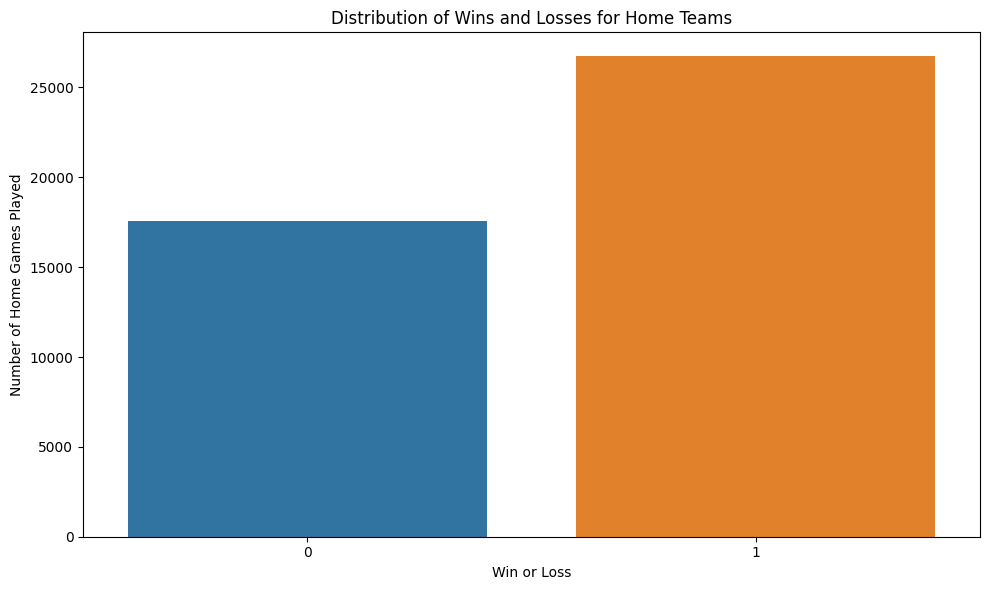

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
# creating a countplot
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x='wl_home');
ax.set_title('Distribution of Wins and Losses for Home Teams')
ax.set_xlabel('Win or Loss')
ax.set_ylabel('Number of Home Games Played')
plt.xticks(rotation=0)
plt.tight_layout();

As we can see from the figure above, home teams win a significantly amount more games than they lose

#### fgm_home

fgm_home = field goal's made for the home team

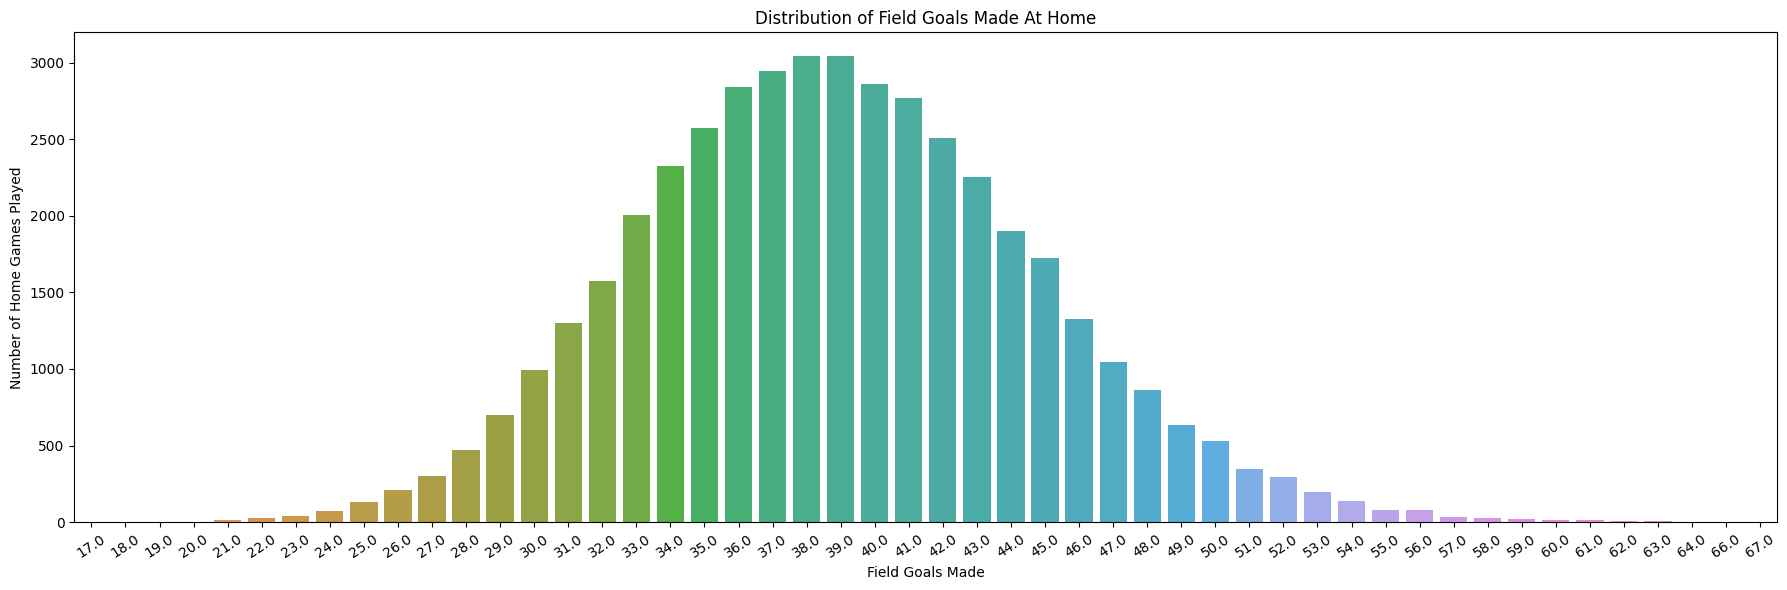

In [150]:
# creating a countplot
plt.figure(figsize=(18,6))
ax = sns.countplot(data=df, x='fgm_home');
ax.set_title('Distribution of Field Goals Made At Home')
ax.set_xlabel('Field Goals Made')
ax.set_ylabel('Number of Home Games Played')
plt.xticks(rotation=33)
plt.tight_layout();

As we can see from the figure above, the majority amount of field goals made at home is between 38-39.

#### fga_home

fga_home = field goal attempts at home

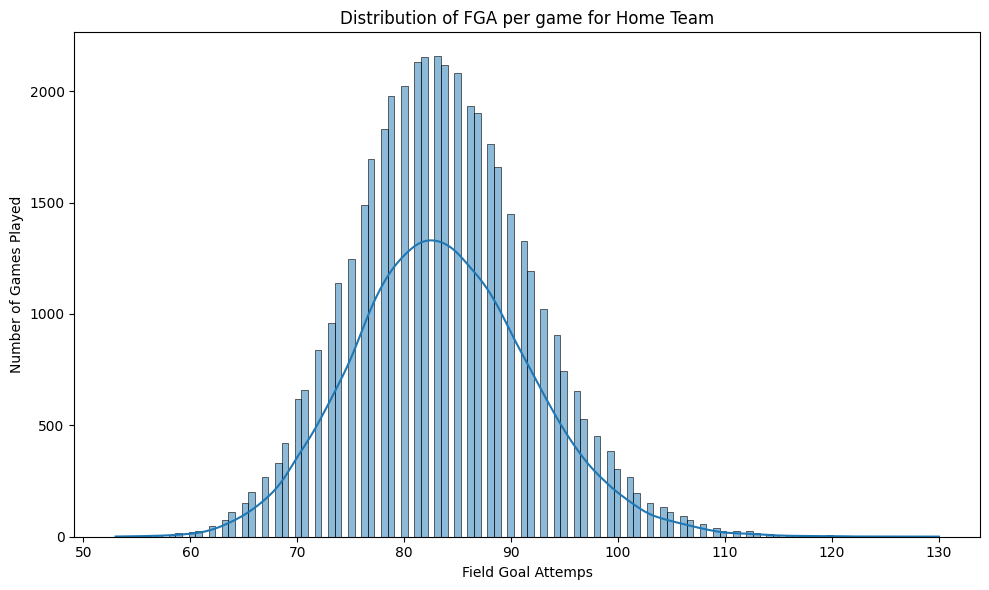

In [151]:
# creating a histogram
plt.figure(figsize=(10,6))
ax = sns.histplot(data=df, x='fga_home', bins='auto', kde=True);
ax.set_title('Distribution of FGA per game for Home Team')
ax.set_xlabel('Field Goal Attemps')
ax.set_ylabel('Number of Games Played')
plt.xticks(rotation=0)
plt.tight_layout();

From the visual above you can see that most teams took an average of 82 field goals.

#### fg_pct_home

fg_pct_home = field goal percentage at home

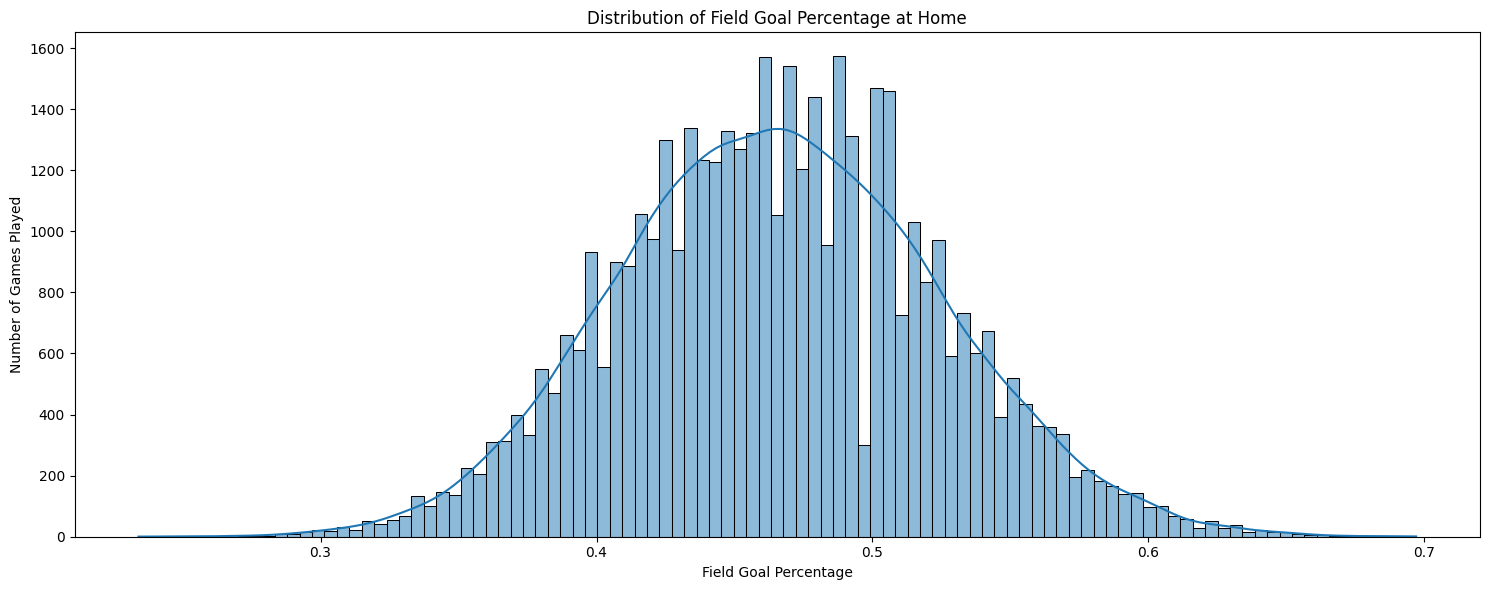

In [152]:
# creating a histogram
plt.figure(figsize=(15,6))
ax = sns.histplot(data=df, x='fg_pct_home', bins='auto', kde=True);
ax.set_title('Distribution of Field Goal Percentage at Home')
ax.set_xlabel('Field Goal Percentage')
ax.set_ylabel('Number of Games Played')
plt.xticks(rotation=0)
plt.tight_layout();

As we can see from the figure above, the average field goal percentage at Home is about 45%

#### fg3m_home

fg3m_home = 3 point field goals made at home

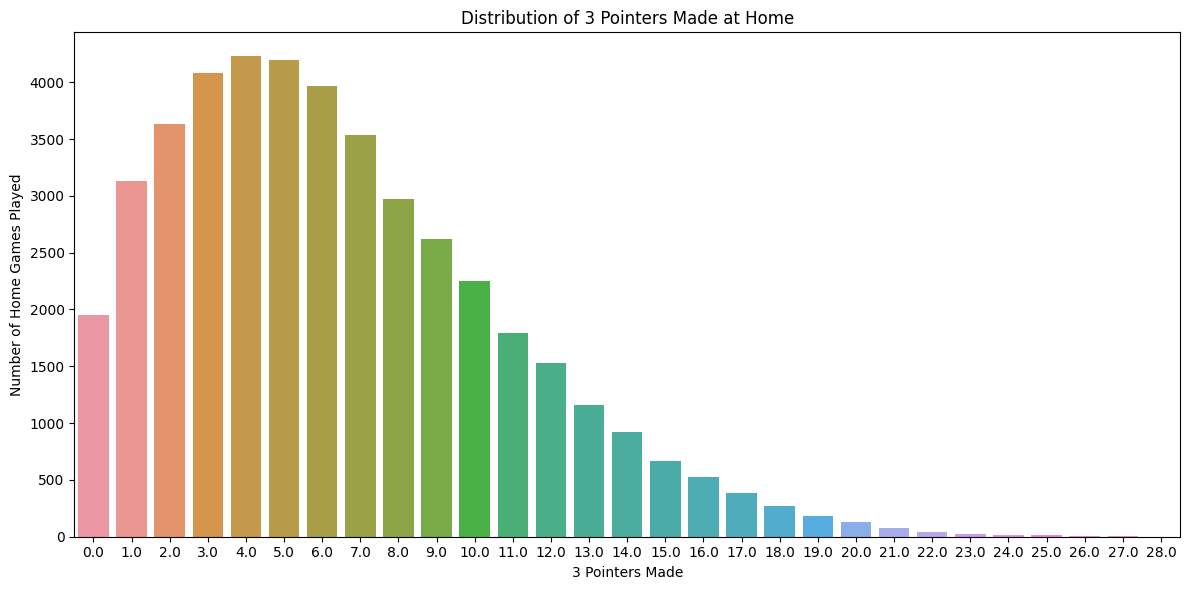

In [153]:
# creating a countplot
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x='fg3m_home');
ax.set_title('Distribution of 3 Pointers Made at Home')
ax.set_xlabel('3 Pointers Made')
ax.set_ylabel('Number of Home Games Played')
plt.xticks(rotation=0)
plt.tight_layout();

As we can see from the visual above, most home teams made 4 three pointers a game

#### fg3a_home

fg3a_home = 3 pointers attempted at Home

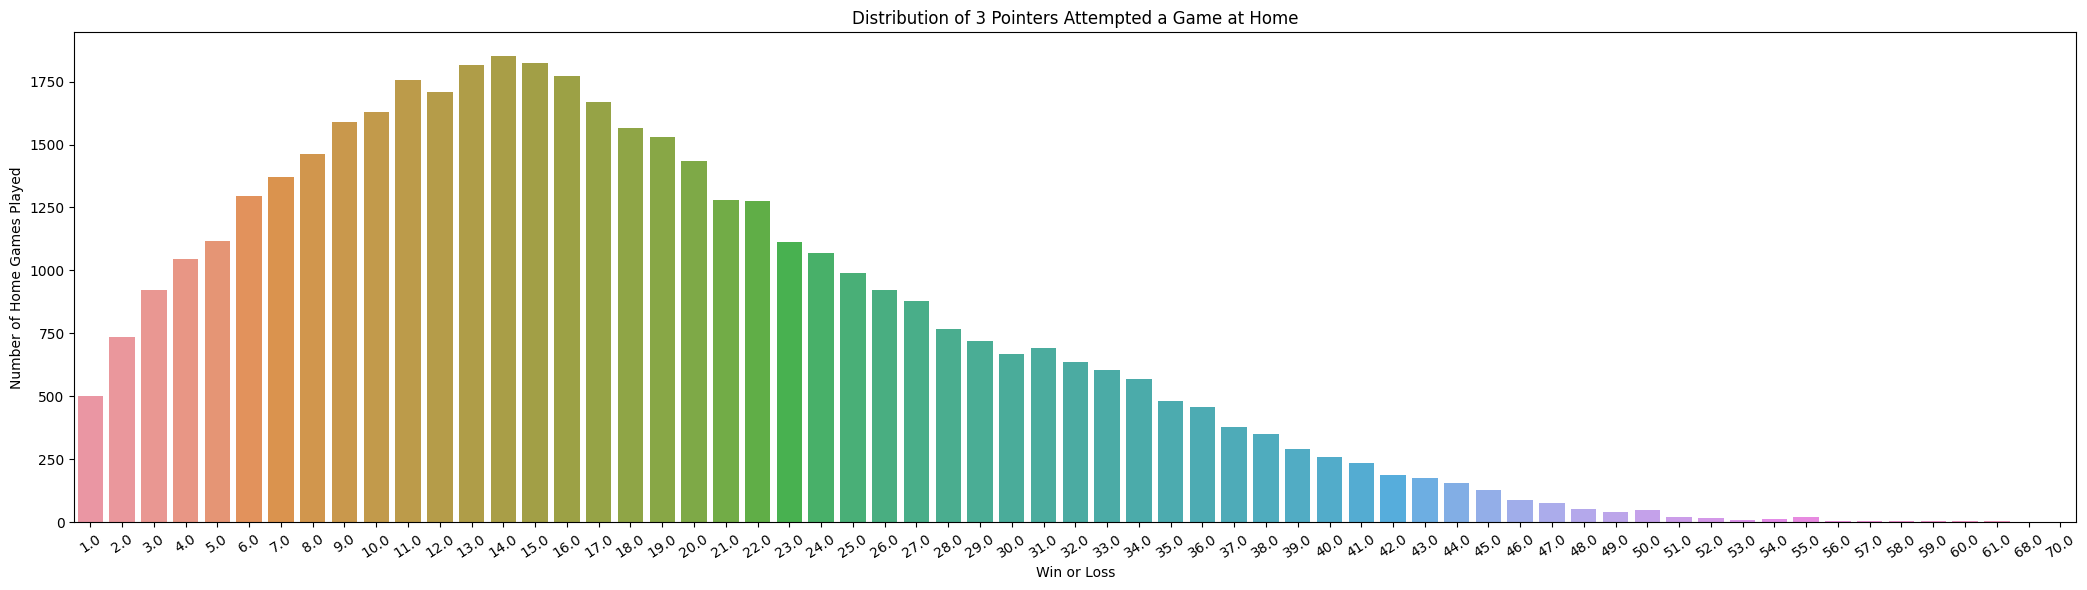

In [154]:
# creating a countplot
plt.figure(figsize=(21,6))
ax = sns.countplot(data=df, x='fg3a_home');
ax.set_title('Distribution of 3 Pointers Attempted a Game at Home')
ax.set_xlabel('Win or Loss')
ax.set_ylabel('Number of Home Games Played')
plt.xticks(rotation=33)
plt.tight_layout();

As you can see from the visual above, majority of teams shot 14 three pointers a game

#### fg3_pct_home

fg3_pct_home = 3 point field goal percentage at home

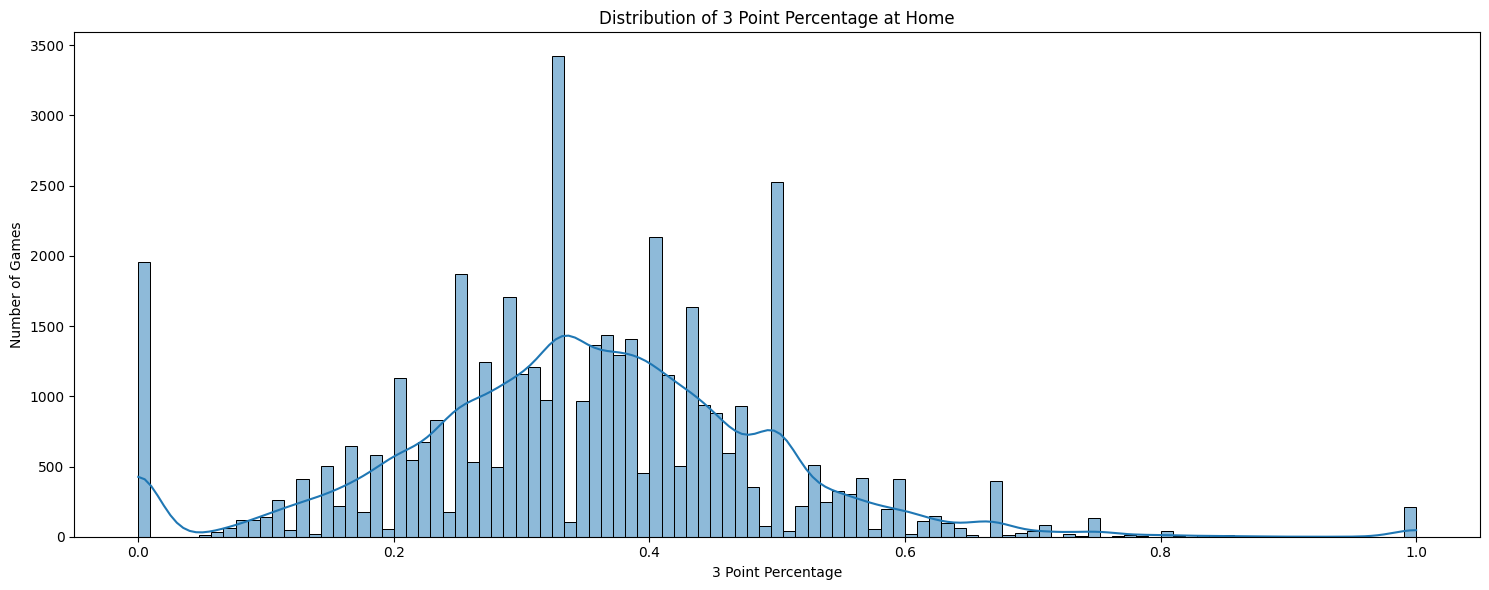

In [155]:
# creating a histogram
plt.figure(figsize=(15,6))
ax = sns.histplot(data=df, x='fg3_pct_home', bins='auto', kde=True);
ax.set_title('Distribution of 3 Point Percentage at Home')
ax.set_xlabel('3 Point Percentage')
ax.set_ylabel('Number of Games')
plt.xticks(rotation=0)
plt.tight_layout();

From the visualization above, most teams shot about 35% from 3 point.

#### ftm_home

ftm_home = free throws made at home

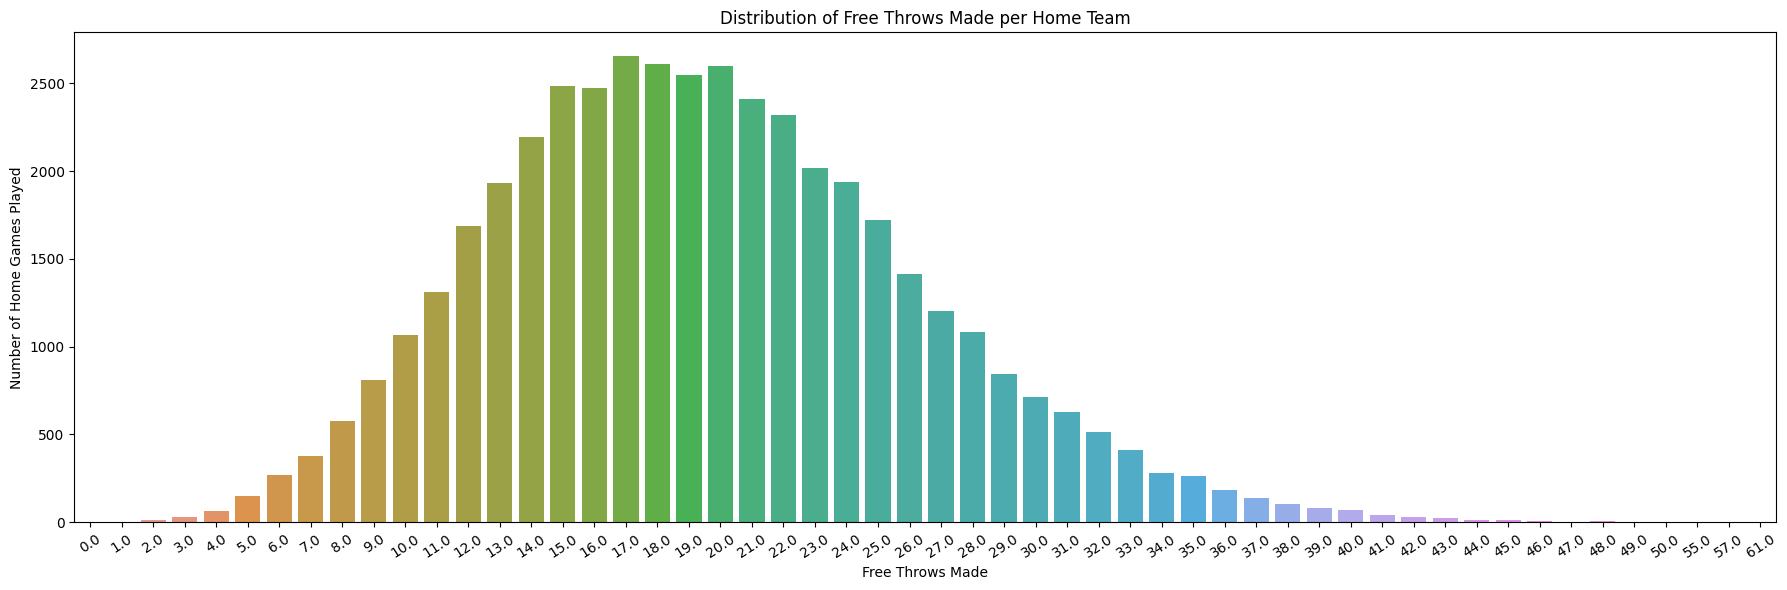

In [156]:
# creating a countplot
plt.figure(figsize=(18,6))
ax = sns.countplot(data=df, x='ftm_home');
ax.set_title('Distribution of Free Throws Made per Home Team')
ax.set_xlabel('Free Throws Made')
ax.set_ylabel('Number of Home Games Played')
plt.xticks(rotation=33)
plt.tight_layout();

From the Visualization, most teams made 17-20 free throws per game.

#### fta_home

fta_home = free throws made at home

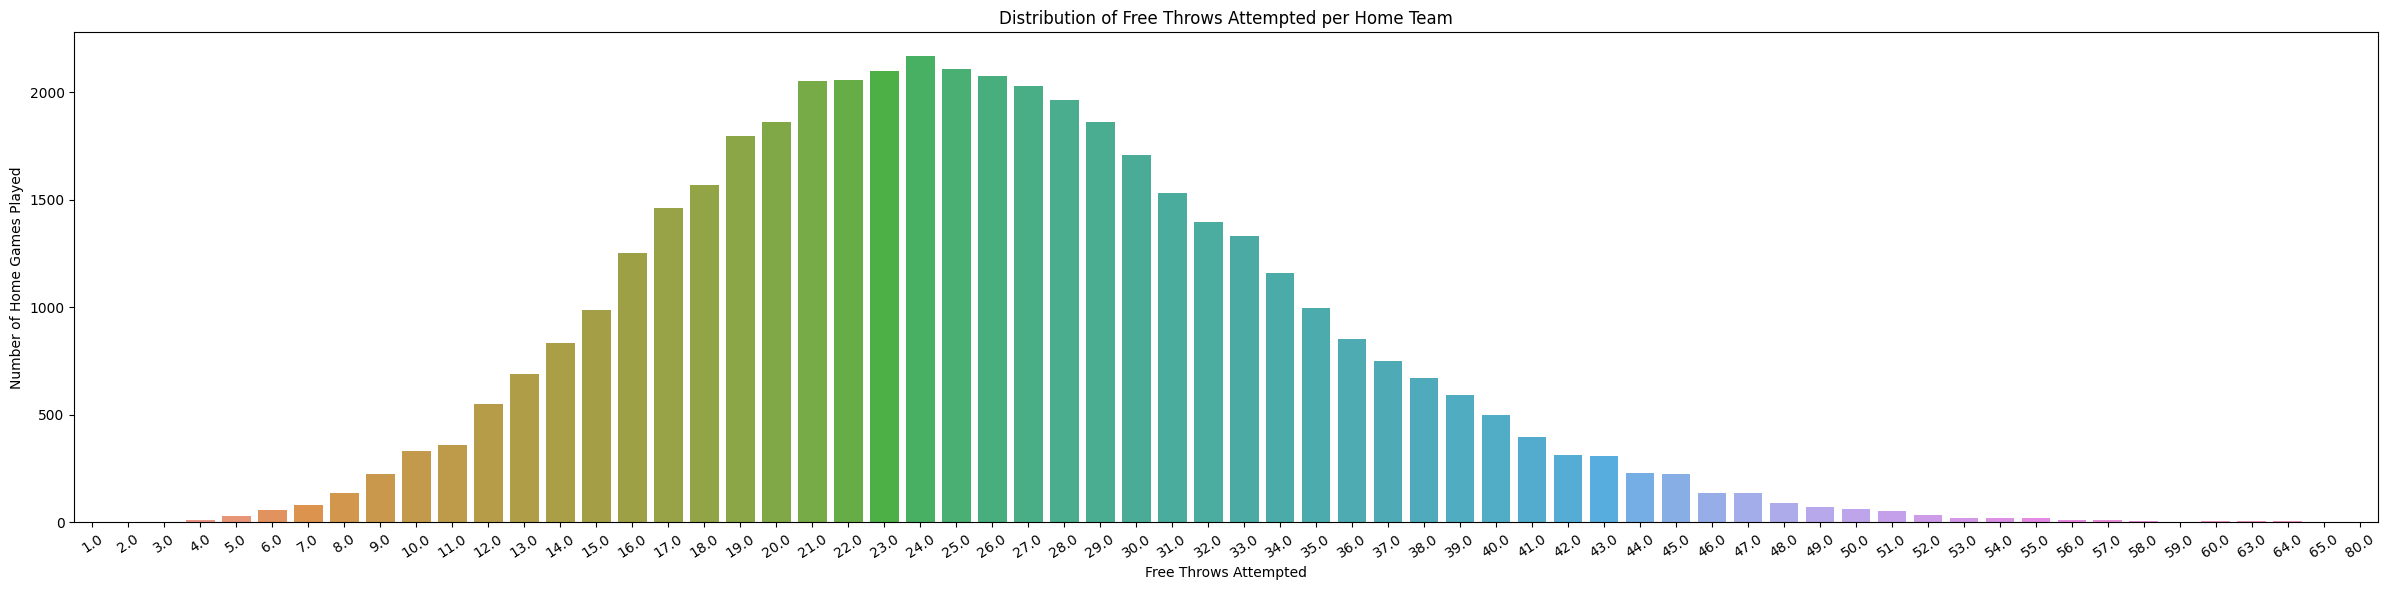

In [157]:
# creating a countplot
plt.figure(figsize=(24,6))
ax = sns.countplot(data=df, x='fta_home');
ax.set_title('Distribution of Free Throws Attempted per Home Team')
ax.set_xlabel('Free Throws Attempted')
ax.set_ylabel('Number of Home Games Played')
plt.xticks(rotation=33)
plt.tight_layout();

From the figure above, we can see that most teams average 25 free throws attempted a game.

#### ft_pct_home

ft_pct_home = free throw percentage at home

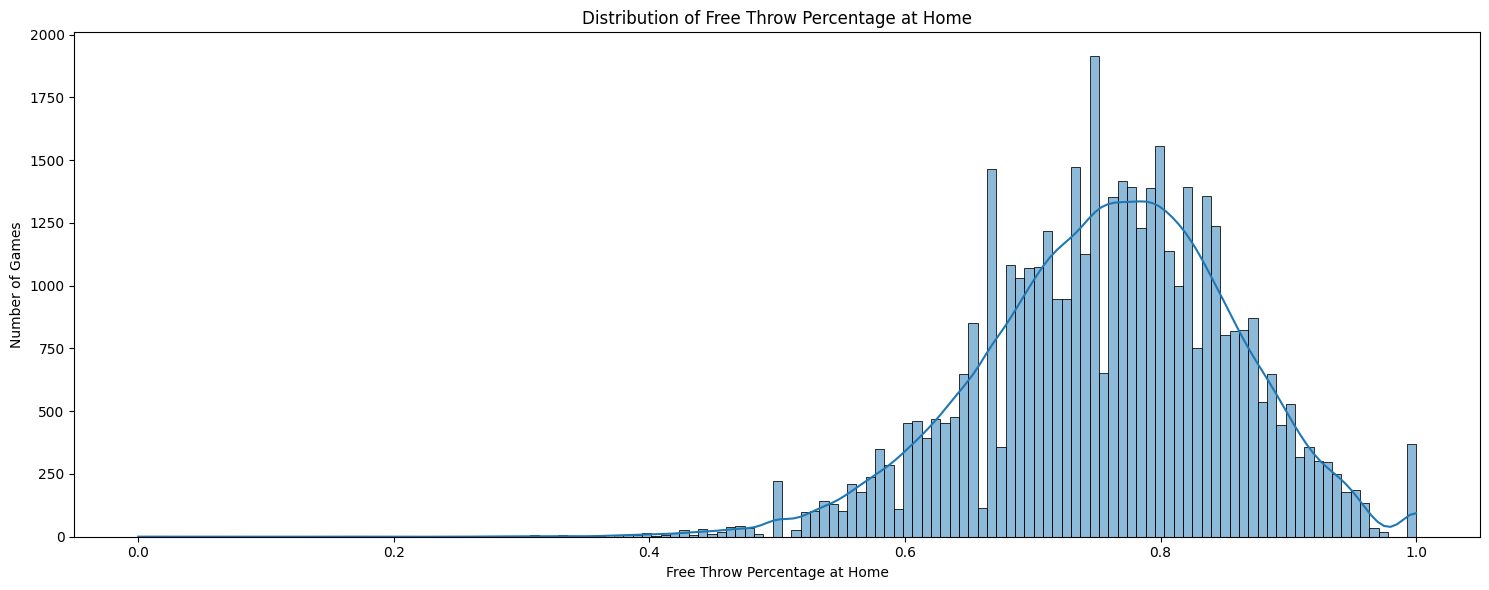

In [158]:
# creating a histogram
plt.figure(figsize=(15,6))
ax = sns.histplot(data=df, x='ft_pct_home', bins='auto', kde=True);
ax.set_title('Distribution of Free Throw Percentage at Home')
ax.set_xlabel('Free Throw Percentage at Home')
ax.set_ylabel('Number of Games')
plt.xticks(rotation=0)
plt.tight_layout();

From the visualization above, we can see the average free throw percentage is 75-80%.

#### oreb_home

oreb_home = offensive rebounds at home

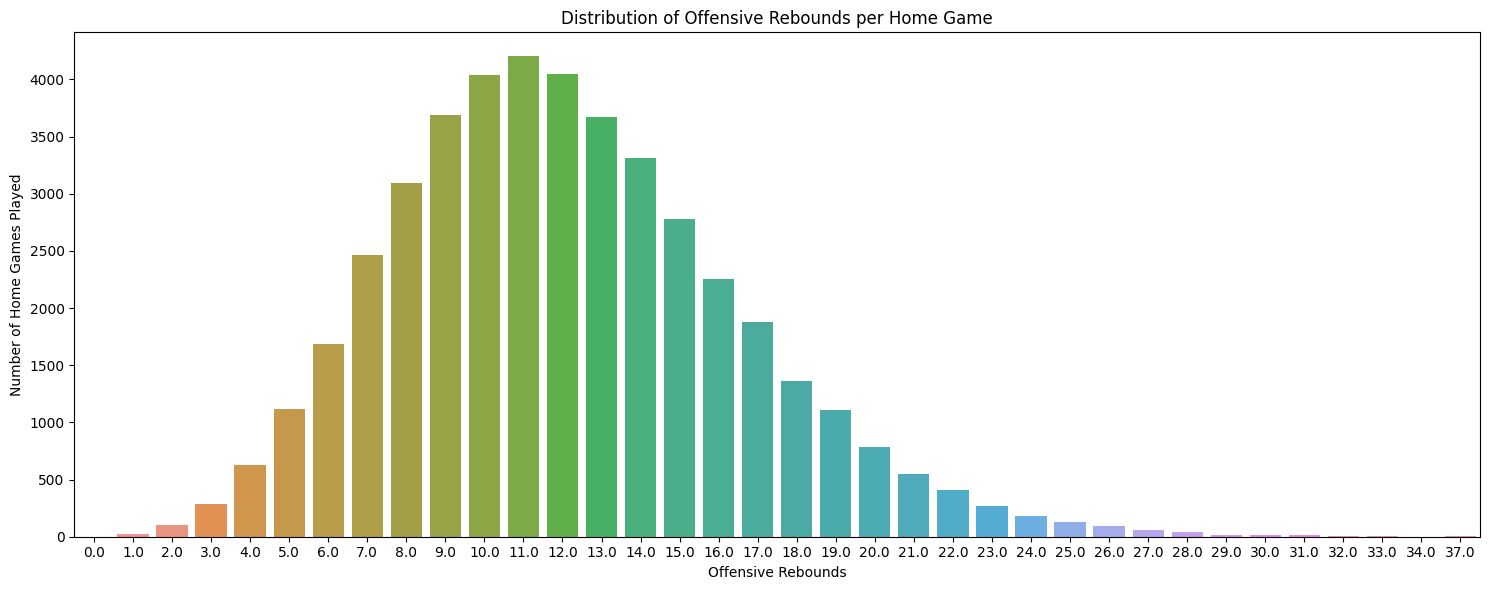

In [159]:
# creating a countplot
plt.figure(figsize=(15,6))
ax = sns.countplot(data=df, x='oreb_home');
ax.set_title('Distribution of Offensive Rebounds per Home Game')
ax.set_xlabel('Offensive Rebounds')
ax.set_ylabel('Number of Home Games Played')
plt.xticks(rotation=0)
plt.tight_layout();

As we can see from the figure above, most home teams grab about 11 offensive rebounds a game

#### dreb_home

dreb_home = defenseive rebounds at home

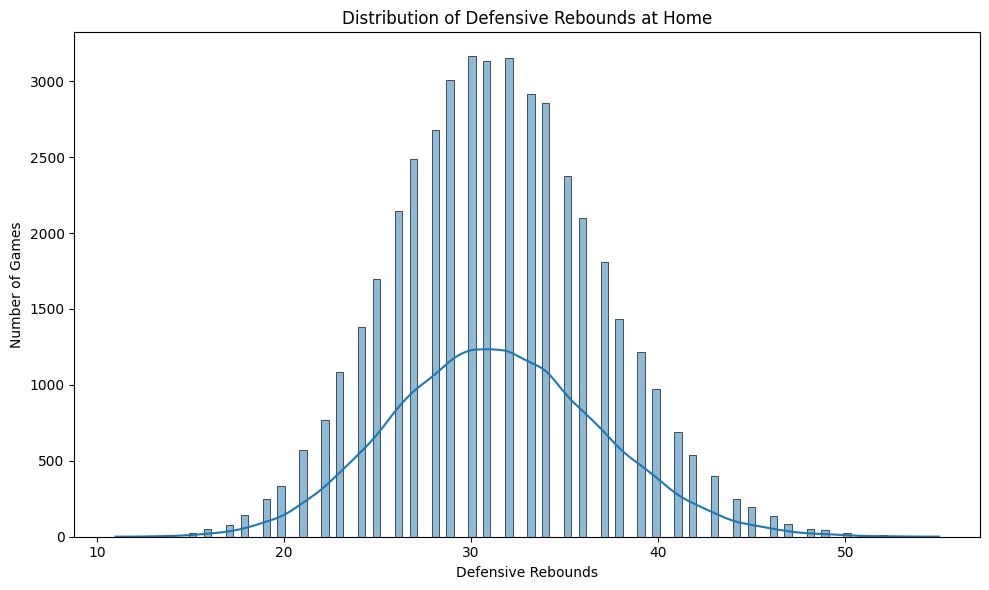

In [160]:
# creating a histogram
plt.figure(figsize=(10,6))
ax = sns.histplot(data=df, x='dreb_home', bins='auto', kde=True);
ax.set_title('Distribution of Defensive Rebounds at Home')
ax.set_xlabel('Defensive Rebounds')
ax.set_ylabel('Number of Games')
plt.xticks(rotation=0)
plt.tight_layout();

As we can see from the figure above, most home teams grab between 30-33 defenseive rebounds a game.

#### reb_home

reb_home = total rebounds at home

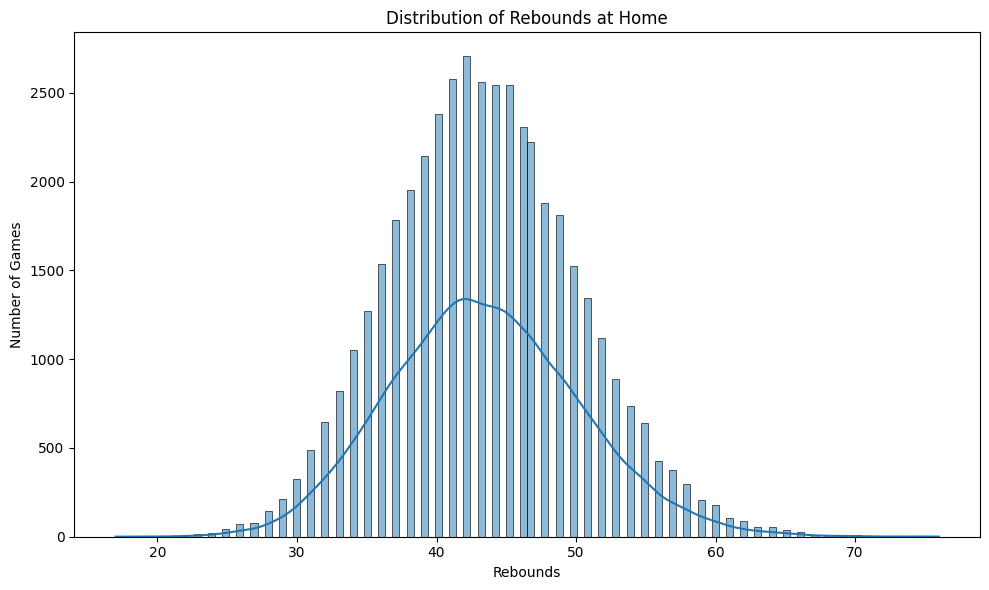

In [161]:
# creating a histogram
plt.figure(figsize=(10,6))
ax = sns.histplot(data=df, x='reb_home', bins='auto', kde=True);
ax.set_title('Distribution of Rebounds at Home')
ax.set_xlabel('Rebounds')
ax.set_ylabel('Number of Games')
plt.xticks(rotation=0)
plt.tight_layout();

As we can see from the figure above, the averge home team grabs between 40-45 rebounds a game.

#### ast_home

ast_home = assists at home

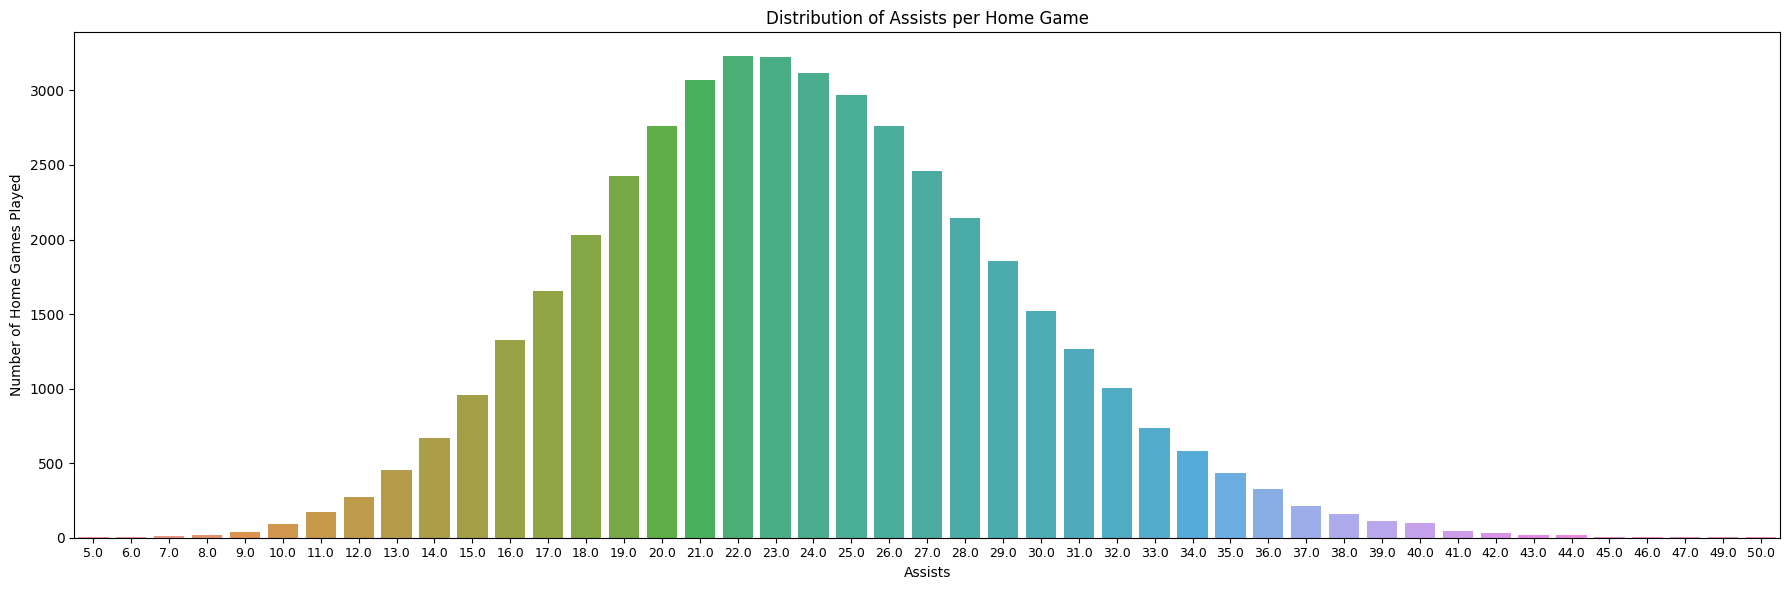

In [162]:
# creating a countplot
plt.figure(figsize=(18,6))
ax = sns.countplot(data=df, x='ast_home');
ax.set_title('Distribution of Assists per Home Game')
ax.set_xlabel('Assists')
ax.set_ylabel('Number of Home Games Played')
plt.xticks(rotation=0, fontsize=9)
plt.tight_layout();

As we can see from the figure above, the average home team gets about 23 assists a game

#### stl_home

stl_home = steals at home

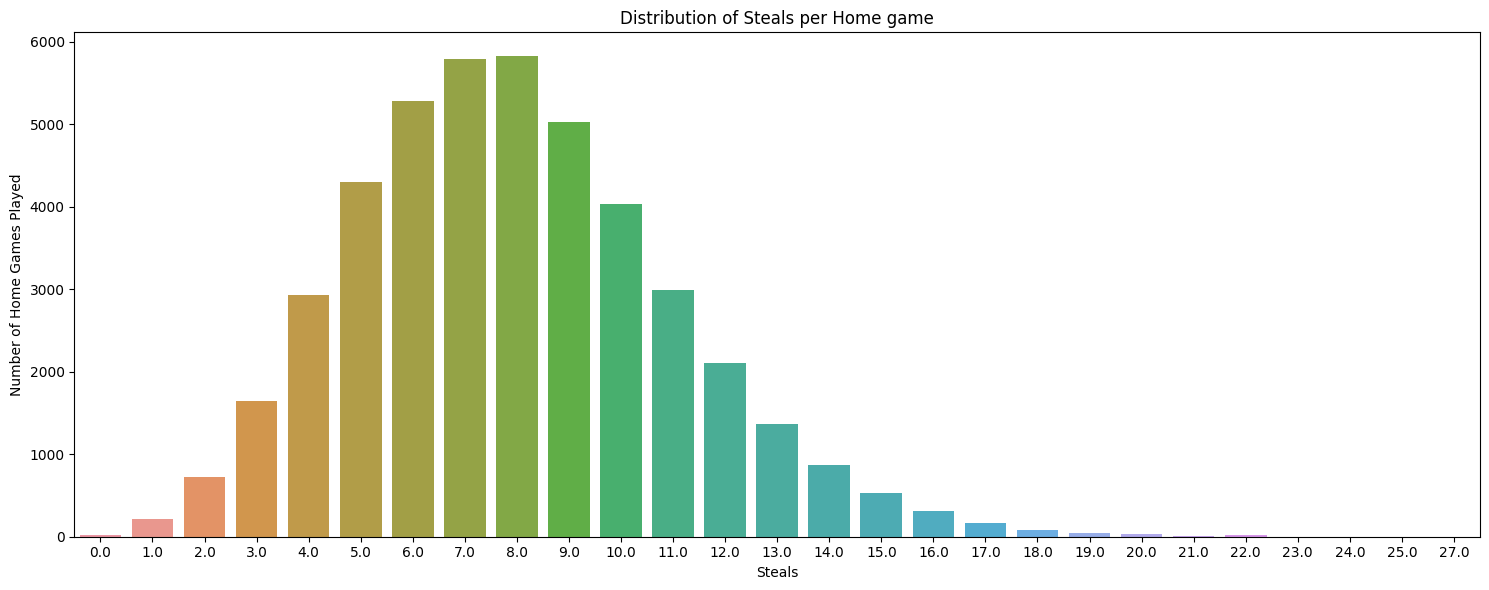

In [163]:
# creating a countplot
plt.figure(figsize=(15,6))
ax = sns.countplot(data=df, x='stl_home');
ax.set_title('Distribution of Steals per Home game')
ax.set_xlabel('Steals')
ax.set_ylabel('Number of Home Games Played')
plt.xticks(rotation=0)
plt.tight_layout();

As we can see from the figure above, the average amount of steals a home team gets is between 7-8.

#### blk_home

blk_home = blocks at home

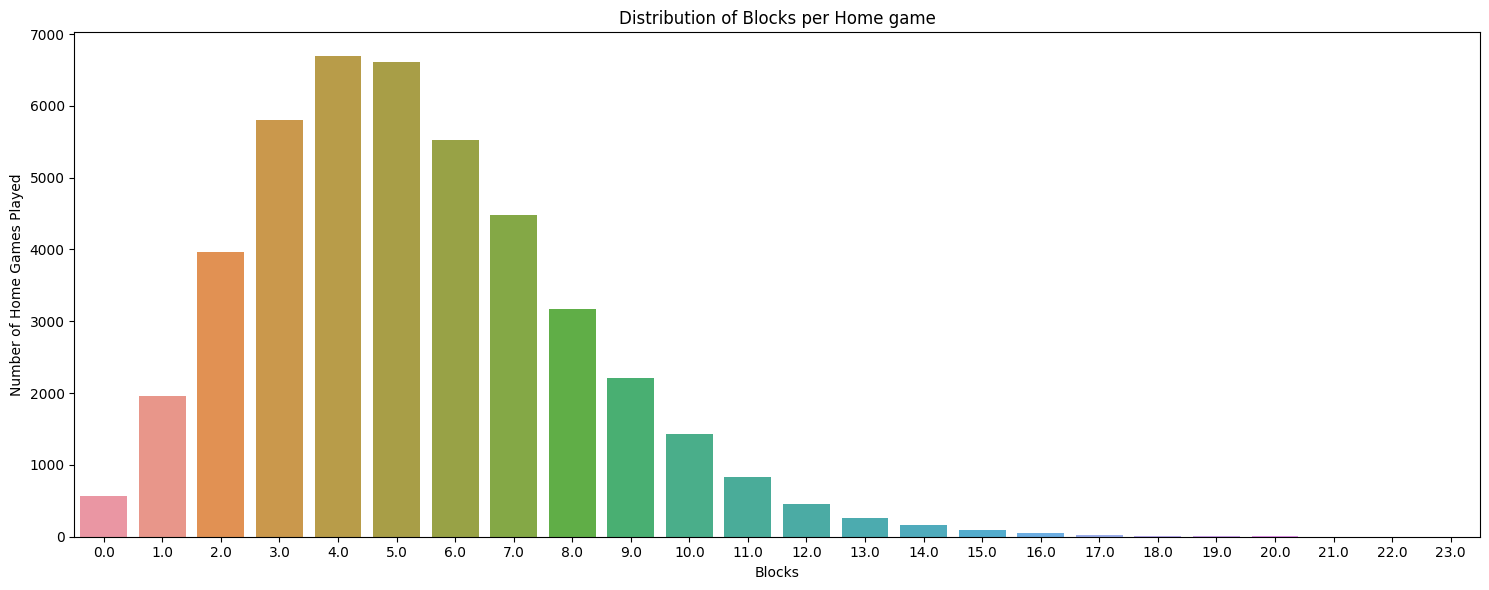

In [164]:
# creating a countplot
plt.figure(figsize=(15,6))
ax = sns.countplot(data=df, x='blk_home');
ax.set_title('Distribution of Blocks per Home game')
ax.set_xlabel('Blocks')
ax.set_ylabel('Number of Home Games Played')
plt.xticks(rotation=0)
plt.tight_layout();

As you can see from the visualization above, the average amount of blocks a Home team gets is between 4-5.

#### tov_home

tov_home = turnovers at home

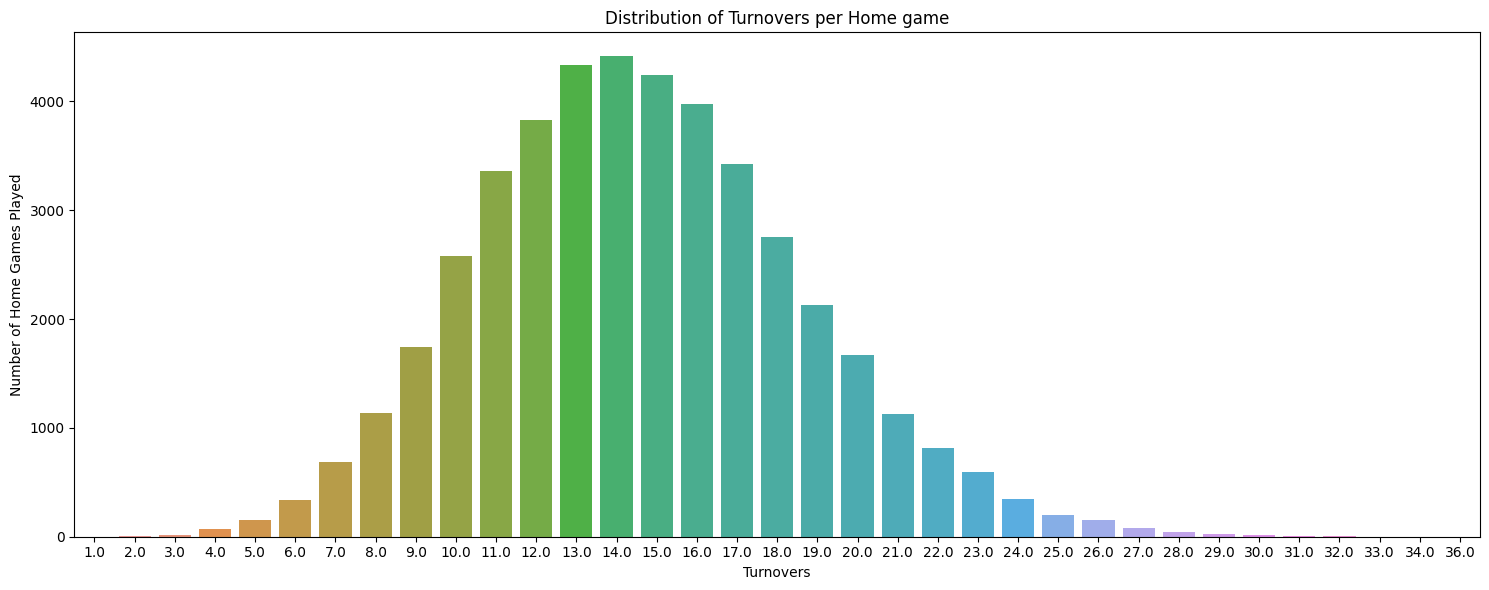

In [165]:
# creating a countplot
plt.figure(figsize=(15,6))
ax = sns.countplot(data=df, x='tov_home');
ax.set_title('Distribution of Turnovers per Home game')
ax.set_xlabel('Turnovers')
ax.set_ylabel('Number of Home Games Played')
plt.xticks(rotation=0)
plt.tight_layout();

As you can see from the graph above, the average amount of turnovers for the Home team is 13-14.

#### pf_home

pf_home = personal fouls at home

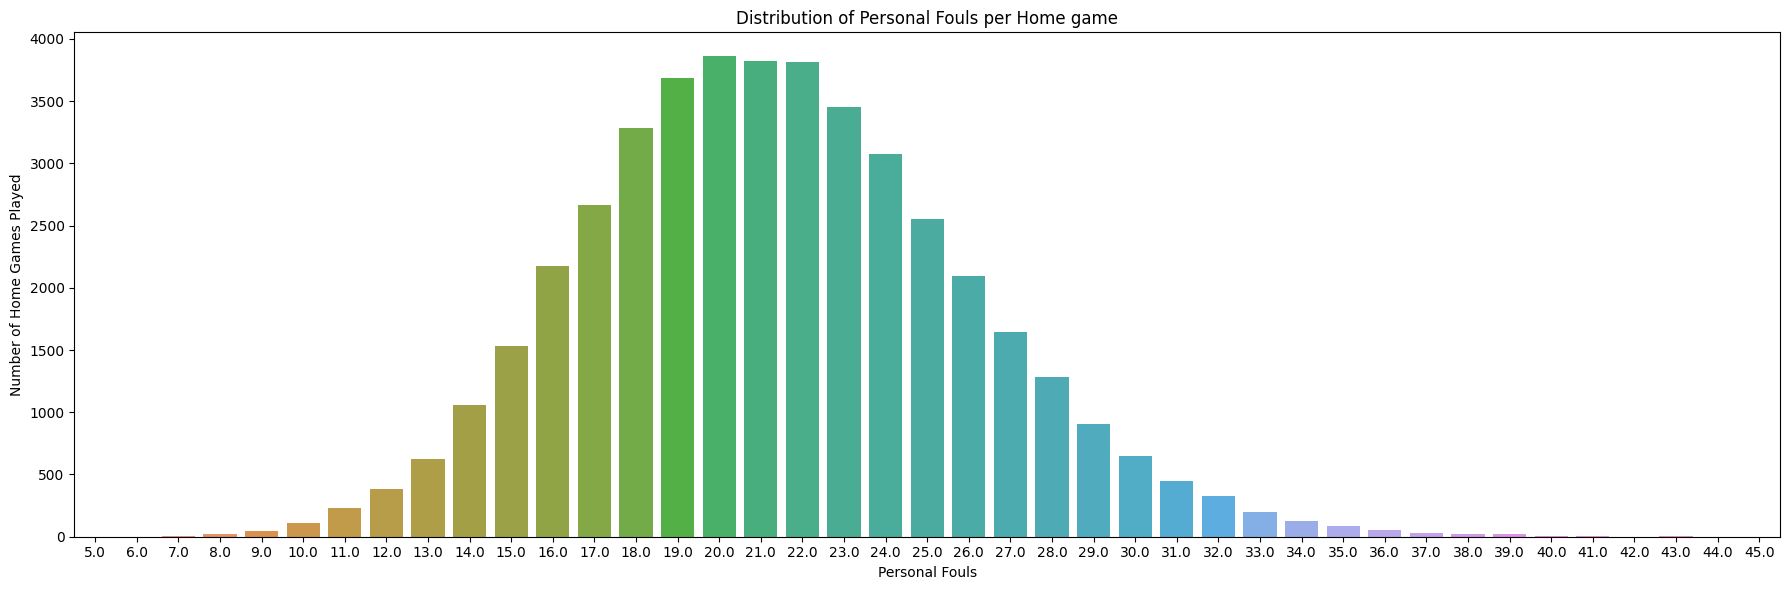

In [166]:
# creating a countplot
plt.figure(figsize=(18,6))
ax = sns.countplot(data=df, x='pf_home');
ax.set_title('Distribution of Personal Fouls per Home game')
ax.set_xlabel('Personal Fouls')
ax.set_ylabel('Number of Home Games Played')
plt.xticks(rotation=0)
plt.tight_layout();

As we can see from the figure above, most home teams commit 19-23 personal fouls a game.

#### pts_home

pts_home = total points scored per home game

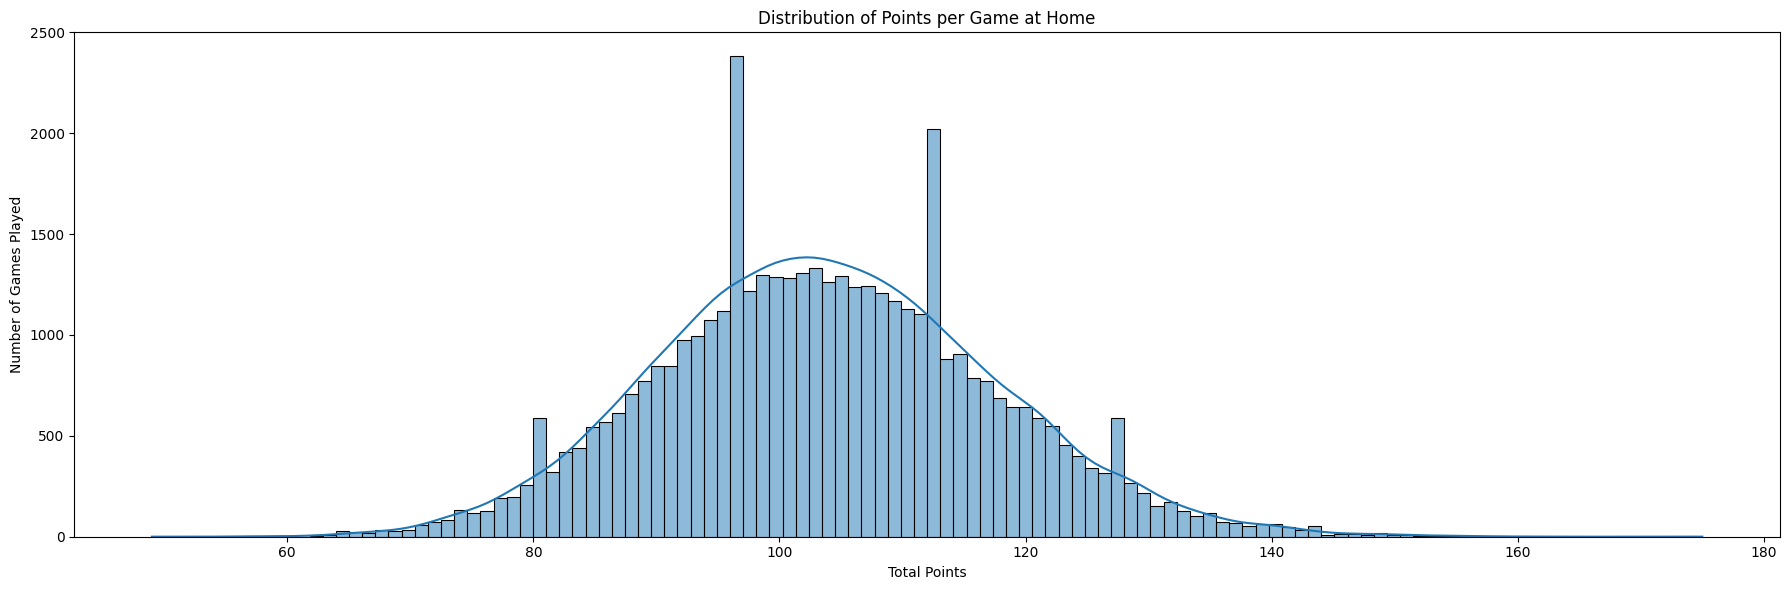

In [167]:
# creating a histogram
plt.figure(figsize=(18,6))
ax = sns.histplot(data=df, x='pts_home', bins='auto', kde=True);
ax.set_title('Distribution of Points per Game at Home')
ax.set_xlabel('Total Points')
ax.set_ylabel('Number of Games Played')
plt.xticks(rotation=0)
plt.tight_layout();

As we can see from the visualization above, most Home teams score about 105 points.

year	month	day

#### year

year = the year the game was played

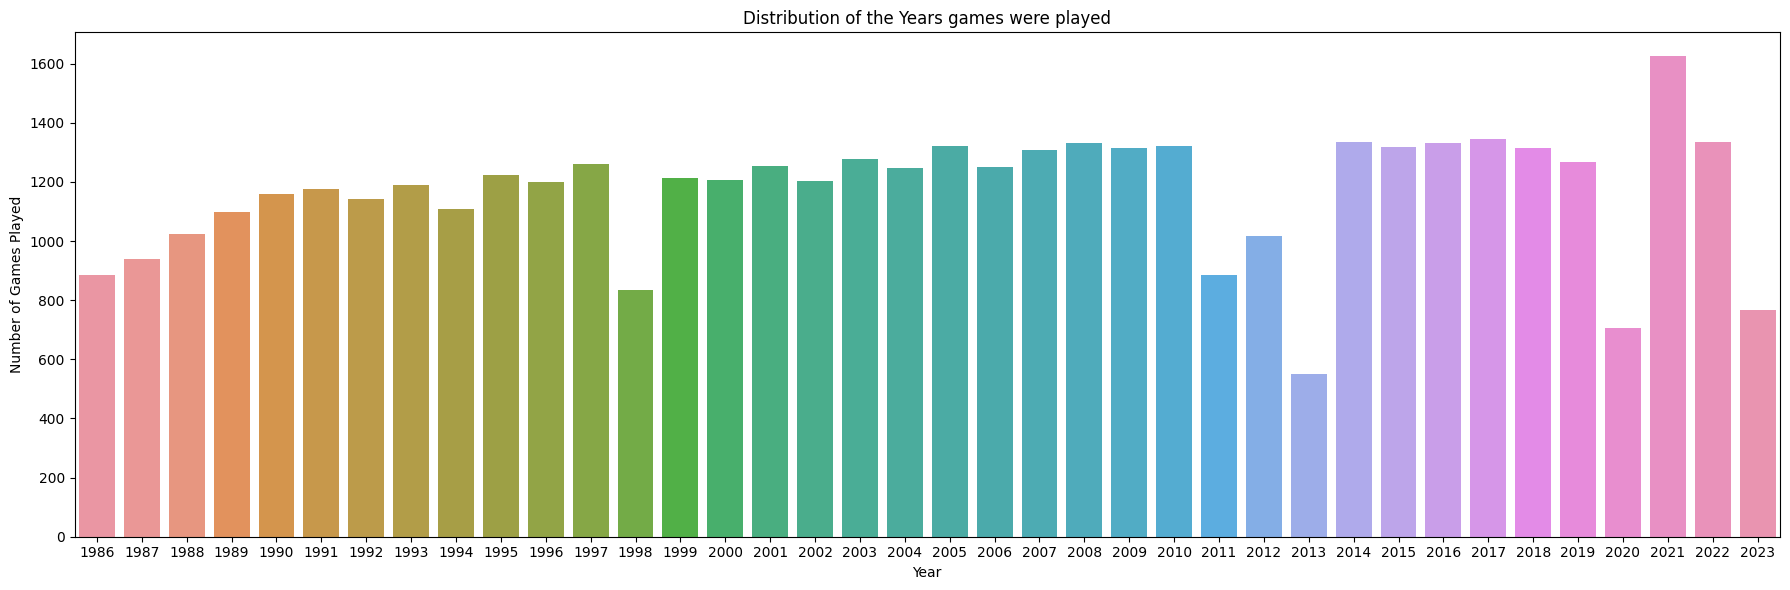

In [168]:
# creating a countplot
plt.figure(figsize=(18,6))
ax = sns.countplot(data=df, x='year');
ax.set_title('Distribution of the Years games were played')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Games Played')
plt.xticks(rotation=0)
plt.tight_layout();

As we can see from this graph, 2021 has the most games played due to covid and the introduction to the play-in tournament, while in 2013 there was a lockout season so there will be fewer games played.

#### season_type

season_type = determining whether it is regular season or playoffs

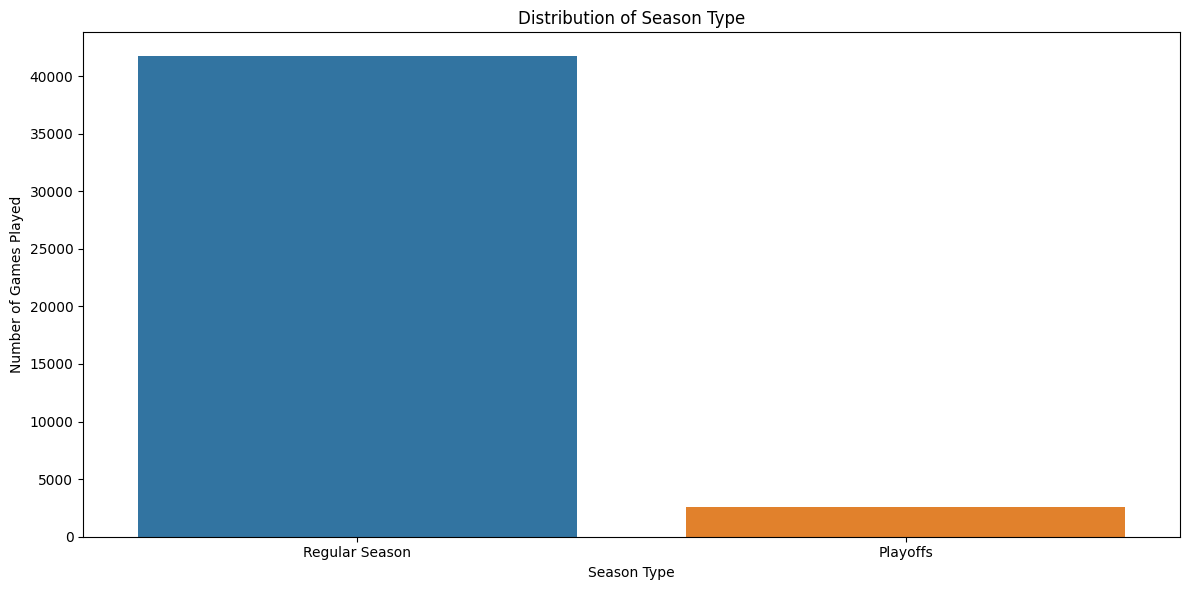

In [169]:
# creating a countplot
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x='season_type');
ax.set_title('Distribution of Season Type')
ax.set_xlabel('Season Type')
ax.set_ylabel('Number of Games Played')
plt.xticks(rotation=0)
plt.tight_layout();

As we can see from the figure above, majority of the games played are in the regular season which makes sense because most games are played in the regular season and the best teams compete in the playoffs.

### Heatmap

In [170]:
# creating a correlation in dataframe
corr = df.corr(numeric_only=True).round(2)
corr

,wl_home,fgm_home,fga_home,fg_pct_home,fg3m_home,fg3a_home,fg3_pct_home,ftm_home,fta_home,ft_pct_home,oreb_home,dreb_home,reb_home,ast_home,stl_home,blk_home,tov_home,pf_home,pts_home,year
wl_home,1.00,0.33,-0.05,0.44,0.08,-0.06,0.22,0.19,0.16,0.11,-0.02,0.31,0.24,0.31,0.17,0.16,-0.07,-0.12,0.40,-0.05
fgm_home,0.33,1.00,0.56,0.74,0.16,0.03,0.19,-0.12,-0.13,0.02,0.06,0.15,0.16,0.70,0.15,0.06,-0.09,0.03,0.85,-0.05
fga_home,-0.05,0.56,1.00,-0.13,0.11,0.18,-0.09,-0.19,-0.20,-0.00,0.49,0.18,0.47,0.30,0.15,0.02,-0.23,0.04,0.42,0.03
fg_pct_home,0.44,0.74,-0.13,1.00,0.10,-0.11,0.30,0.01,0.01,0.02,-0.32,0.03,-0.18,0.59,0.06,0.05,0.07,0.01,0.68,-0.09
fg3m_home,0.08,0.16,0.11,0.10,1.00,0.88,0.46,-0.22,-0.25,0.05,-0.28,0.22,0.00,0.15,-0.09,-0.08,-0.10,-0.16,0.35,0.69
fg3a_home,-0.06,0.03,0.18,-0.11,0.88,1.00,0.12,-0.23,-0.26,0.05,-0.23,0.25,0.05,0.01,-0.10,-0.10,-0.12,-0.17,0.19,0.79
fg3_pct_home,0.22,0.19,-0.09,0.30,0.46,0.12,1.00,-0.06,-0.07,0.02,-0.17,0.03,-0.08,0.21,-0.03,0.01,-0.00,-0.03,0.28,0.10
ftm_home,0.19,-0.12,-0.19,0.01,-0.22,-0.23,-0.06,1.00,0.93,0.33,0.09,-0.00,0.06,-0.07,0.08,0.05,0.08,0.26,0.32,-0.22
fta_home,0.16,-0.13,-0.20,0.01,-0.25,-0.26,-0.07,0.93,1.00,-0.02,0.14,-0.01,0.09,-0.09,0.09,0.07,0.09,0.28,0.26,-0.26
ft_pct_home,0.11,0.02,-0.00,0.02,0.05,0.05,0.02,0.33,-0.02,1.00,-0.10,0.02,-0.05,0.02,-0.03,-0.02,-0.02,-0.02,0.19,0.06


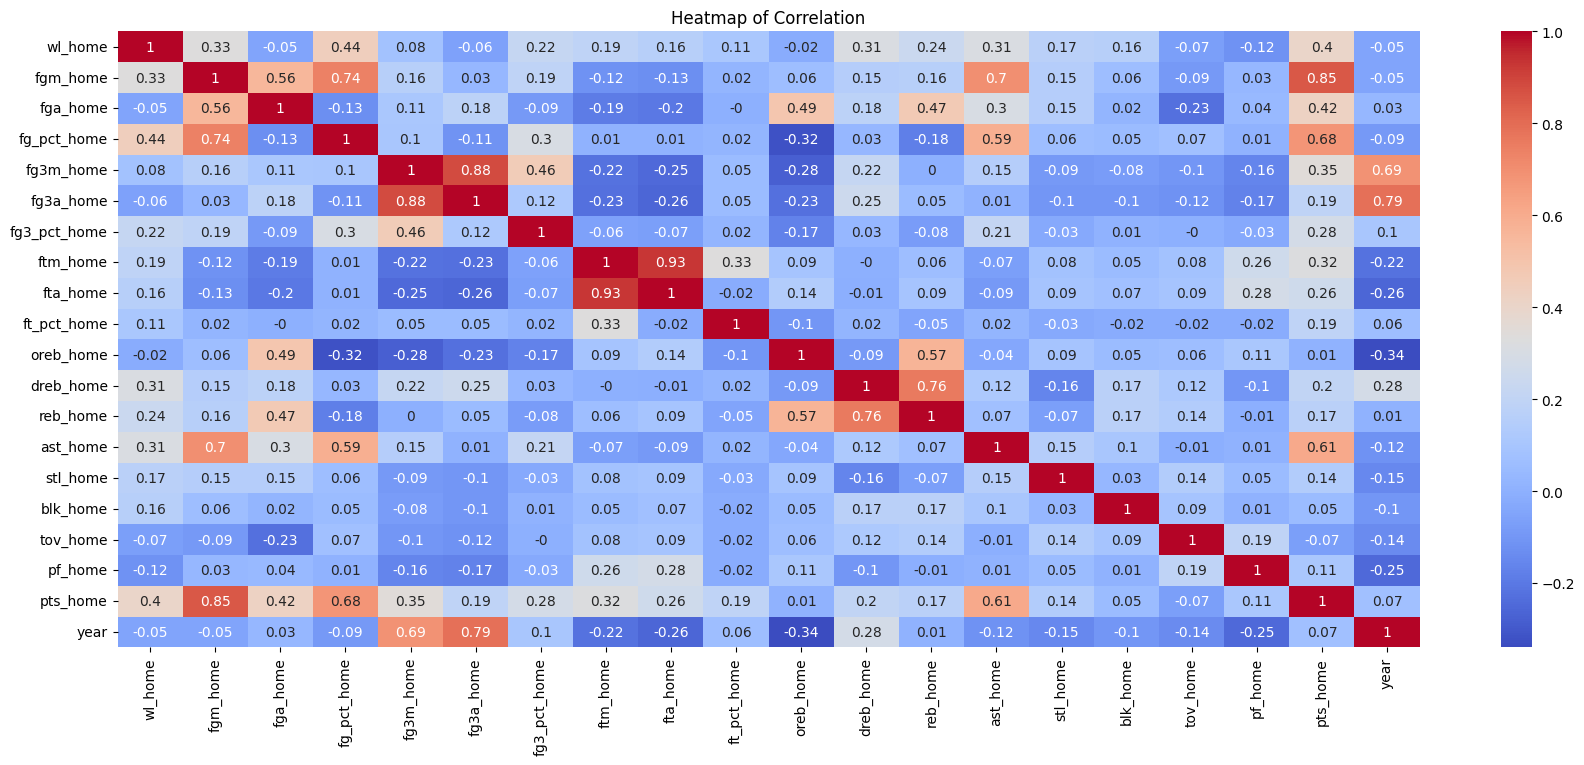

In [171]:
# creating a heatmap
plt.figure(figsize=(21,8))
ax = sns.heatmap(corr, cmap='coolwarm', annot=True)
ax.set_title('Heatmap of Correlation');

Some Correlations to note:
- fg3m_home - year: .69
- fg3a_home - year: .79
- fgm_home - pts_home: .85
- fg_pct_home - pts_home: .68
- fgm_home - fg_pct_home: .74
- ast_home - fgm_home: .7

### Multivariate Visualizations

#### Points v Field Goals Made

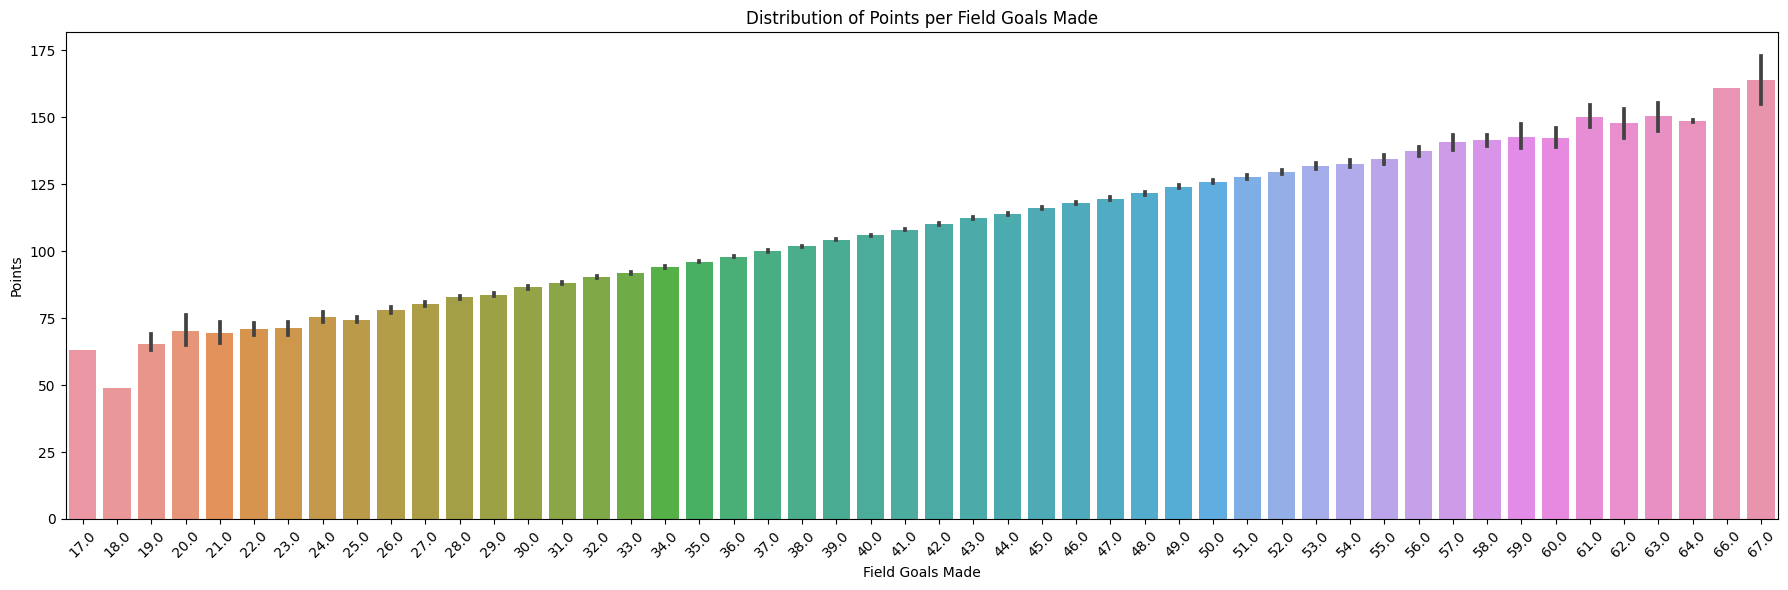

In [172]:
# creating a barplot
plt.figure(figsize=(18,6))
ax = sns.barplot(data=df, x='fgm_home', y='pts_home');
ax.set_title('Distribution of Points per Field Goals Made')
ax.set_xlabel('Field Goals Made')
ax.set_ylabel('Points')
plt.xticks(rotation=45)
plt.tight_layout();

As you can see from the visualization above, the more field goals made, the more points the team will get.

#### 3 Point Attempts per Year

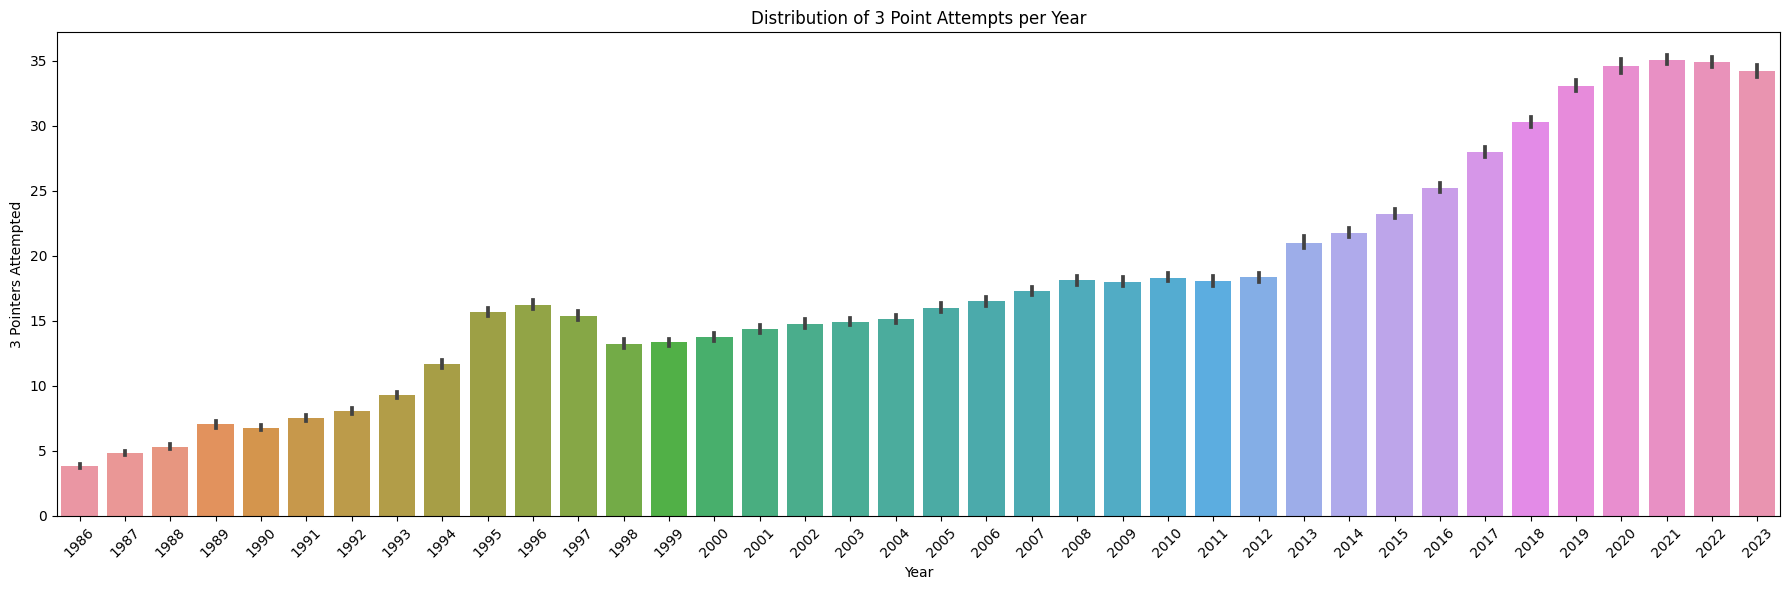

In [173]:
# creating a barplot
plt.figure(figsize=(18,6))
ax = sns.barplot(data=df, x='year', y='fg3a_home');
ax.set_title('Distribution of 3 Point Attempts per Year')
ax.set_xlabel('Year')
ax.set_ylabel('3 Pointers Attempted')
plt.xticks(rotation=45)
plt.tight_layout();

As you can see from the graph above, teams have taken more and more threes over the years.

#### 3 Point Percentage Over the Years

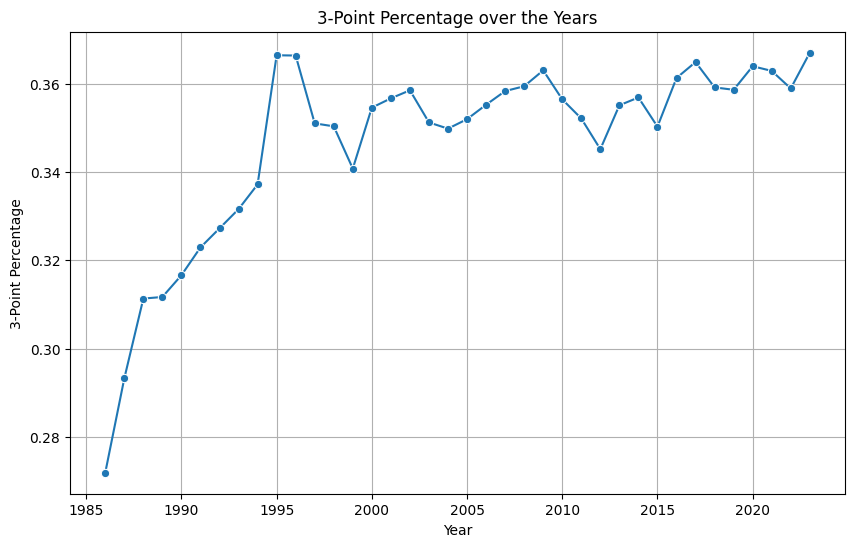

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping the data by 'year' and calculating the mean of 'fg3_pct_home' for each year
year_3pt_percent = df.groupby('year')['fg3_pct_home'].mean().reset_index()

# Creating the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=year_3pt_percent, x='year', y='fg3_pct_home', marker='o')
plt.xlabel('Year')
plt.ylabel('3-Point Percentage')
plt.title('3-Point Percentage over the Years')
plt.grid(True)
plt.show()

As you can see from the graph above, not only have teams been taking more threes per game but they have also become more efficient over the years at taking threes.

### Graphs, Graphs, and more Graphs

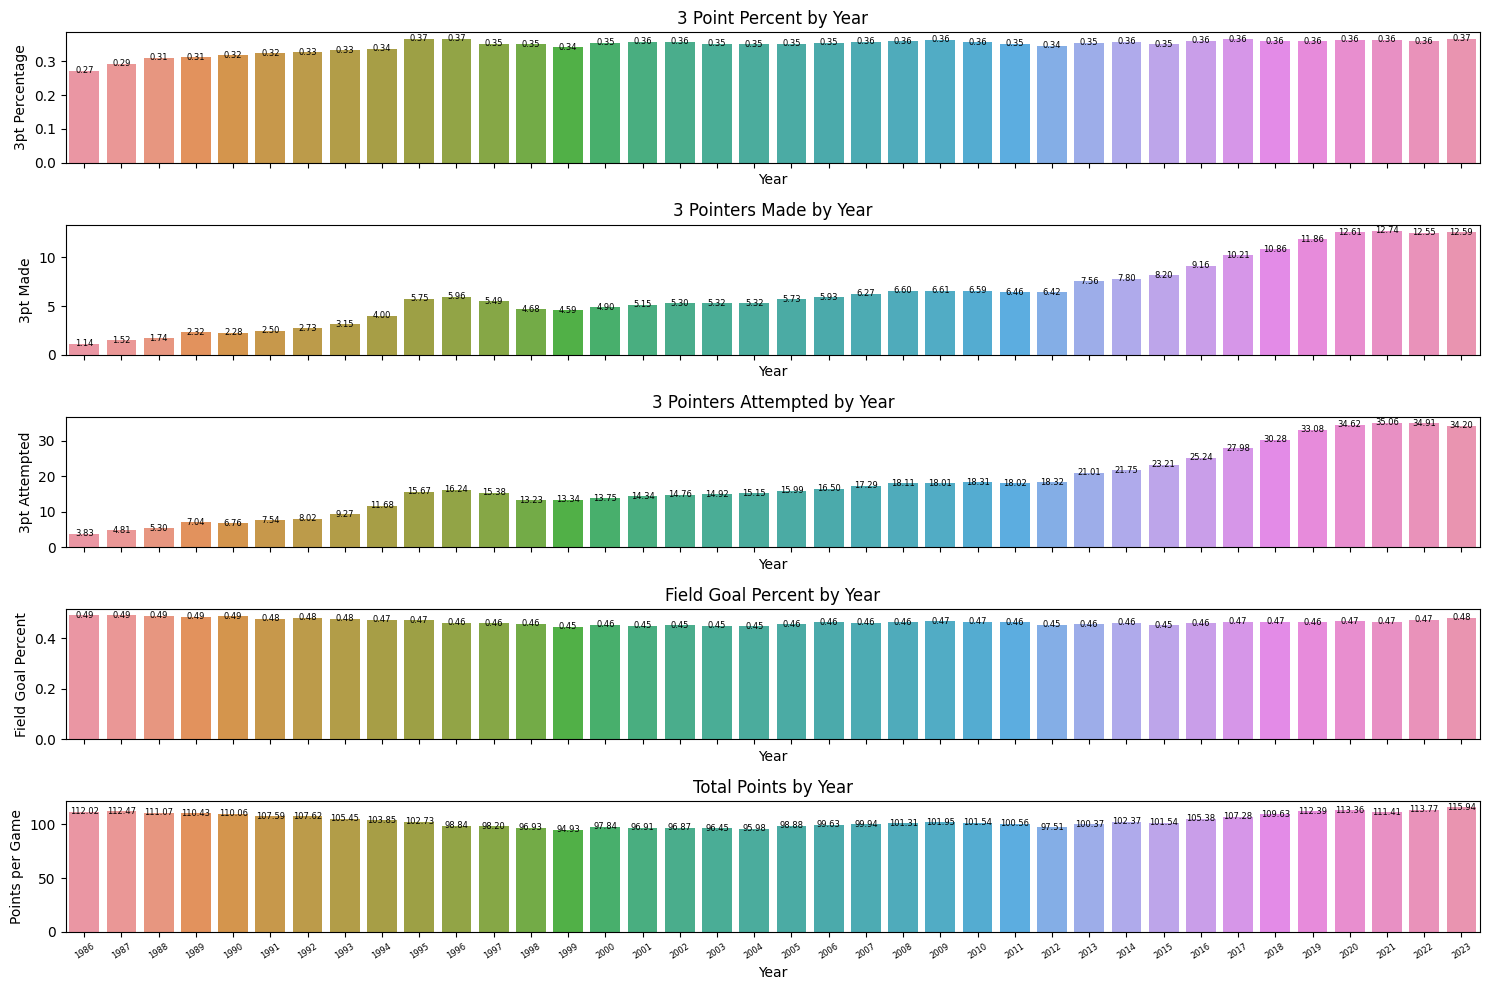

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns
tot_pts = df.groupby('year')['pts_home'].mean().sort_values(ascending=False).reset_index()
year_3pta = df.groupby('year')['fg3a_home'].mean().sort_values(ascending=False).reset_index()
year_3ptm = df.groupby('year')['fg3m_home'].mean().sort_values(ascending=False).reset_index()
year_3pt_percent = df.groupby('year')['fg3_pct_home'].mean().round(3).sort_values(ascending=False).reset_index()
year_fg_pct = df.groupby('year')['fg_pct_home'].mean().sort_values(ascending=False).reset_index()

# creating 3 rows of plots
fig, axes = plt.subplots(nrows=5, figsize=(15, 10), sharex=True)

# creating a function to display values on top of the bars
def show_values_on_bars(ax):
    for i in ax.patches:
        height = i.get_height()
        ax.text(i.get_x() + i.get_width() / 2., height, f'{height:.2f}', ha='center', va='center', fontsize=6)

# 3 point percent barplot
sns.barplot(data=year_3pt_percent, x='year', y='fg3_pct_home', ax=axes[0])
show_values_on_bars(axes[0])

axes[0].set_title('3 Point Percent by Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('3pt Percentage')


# 3 pointers made barplot
sns.barplot(data=year_3ptm, x='year', y='fg3m_home', ax=axes[1])
show_values_on_bars(axes[1])

axes[1].set_title('3 Pointers Made by Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('3pt Made')


# 3 pointers attempted barplot
sns.barplot(data=year_3pta, x='year', y='fg3a_home', ax=axes[2])
show_values_on_bars(axes[2])

axes[2].set_title('3 Pointers Attempted by Year')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('3pt Attempted')


# field goal attempts per year barplot
sns.barplot(data=year_fg_pct, x='year', y='fg_pct_home', ax=axes[3])
show_values_on_bars(axes[3])

axes[3].set_title('Field Goal Percent by Year')
axes[3].set_xlabel('Year')
axes[3].set_ylabel('Field Goal Percent')


# total points per year barplot
sns.barplot(data=tot_pts, x='year', y='pts_home', ax=axes[4])
show_values_on_bars(axes[4])

axes[4].set_title('Total Points by Year')
axes[4].set_xlabel('Year')
axes[4].set_ylabel('Points per Game')

axes[4].tick_params(axis='x', labelsize=6, rotation=33)

fig.tight_layout();

Graph 1:
- This graph is taking a look at the 3 point percentage over the years, as you can see there is a gradual incline indicating that players are becoming more efficient at shooting 3 pointers.

Graph 2 & 3:
- These graphs are taking a look at 3 pointers made per year (graph 2) and 3 pointers attempted per year (graph 3). As you can clearly tell from the graph there is an increase in both the amount of 3 pointers taken and made. This can be reflected back to graph 1 as the 3 point percentage has slowly increased even with the volume increasing as well.

Graph 4:
- This graph is taking a look at the average field goal percentage per year. I wanted to explore this as well because this includes both 3 point shot and 2 point shot attempts. Even with the increase of 3 point shots taken increasing significantly, the field goal percentage stays roughly the same and even increases over the last 10 years when the three point attempts spiked.

Graph 5:
- This graph represents the points per game per year. I wanted to look more into this as well, if they are making more threes does it lead to more points? This isn't the only indicator that teams would be scoring more points, (different playstyles, pace of the game, etc.) but it can be a starting point. As you can see from the points per game takes a dip from 1998 to 2012, then surges back up to it's highest over the last 35 years where 3 point shots taken are at an all time high.

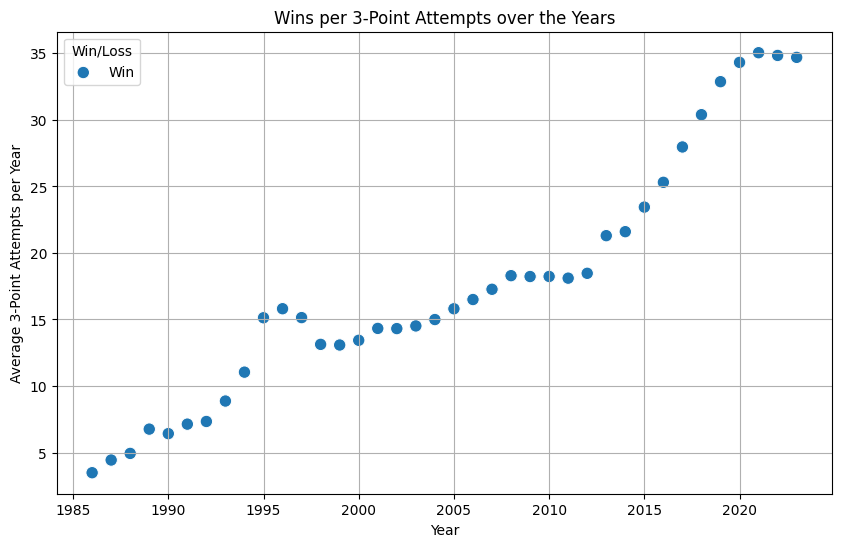

In [176]:
# Grouping the data by 'wl_home' and 'year', and calculating the mean of 'fg3a_home' for each group
wins_3pta = df.groupby(['wl_home', 'year'])['fg3a_home'].mean().reset_index()

# Filtering the data for 'wl_home' where wins are 1 (win)
wins_data = wins_3pta[wins_3pta['wl_home'] == 1]

# Creating the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=wins_data, x='year', y='fg3a_home', hue='wl_home', marker='o', s=80)
plt.xlabel('Year')
plt.ylabel('Average 3-Point Attempts per Year')
plt.title('Wins per 3-Point Attempts over the Years')
plt.grid(True)
plt.legend(title='Win/Loss', labels=['Win'])
plt.show()

As you can see from the graph above, the amount of 3 point shots attempted that resulted in a win has increased each year.

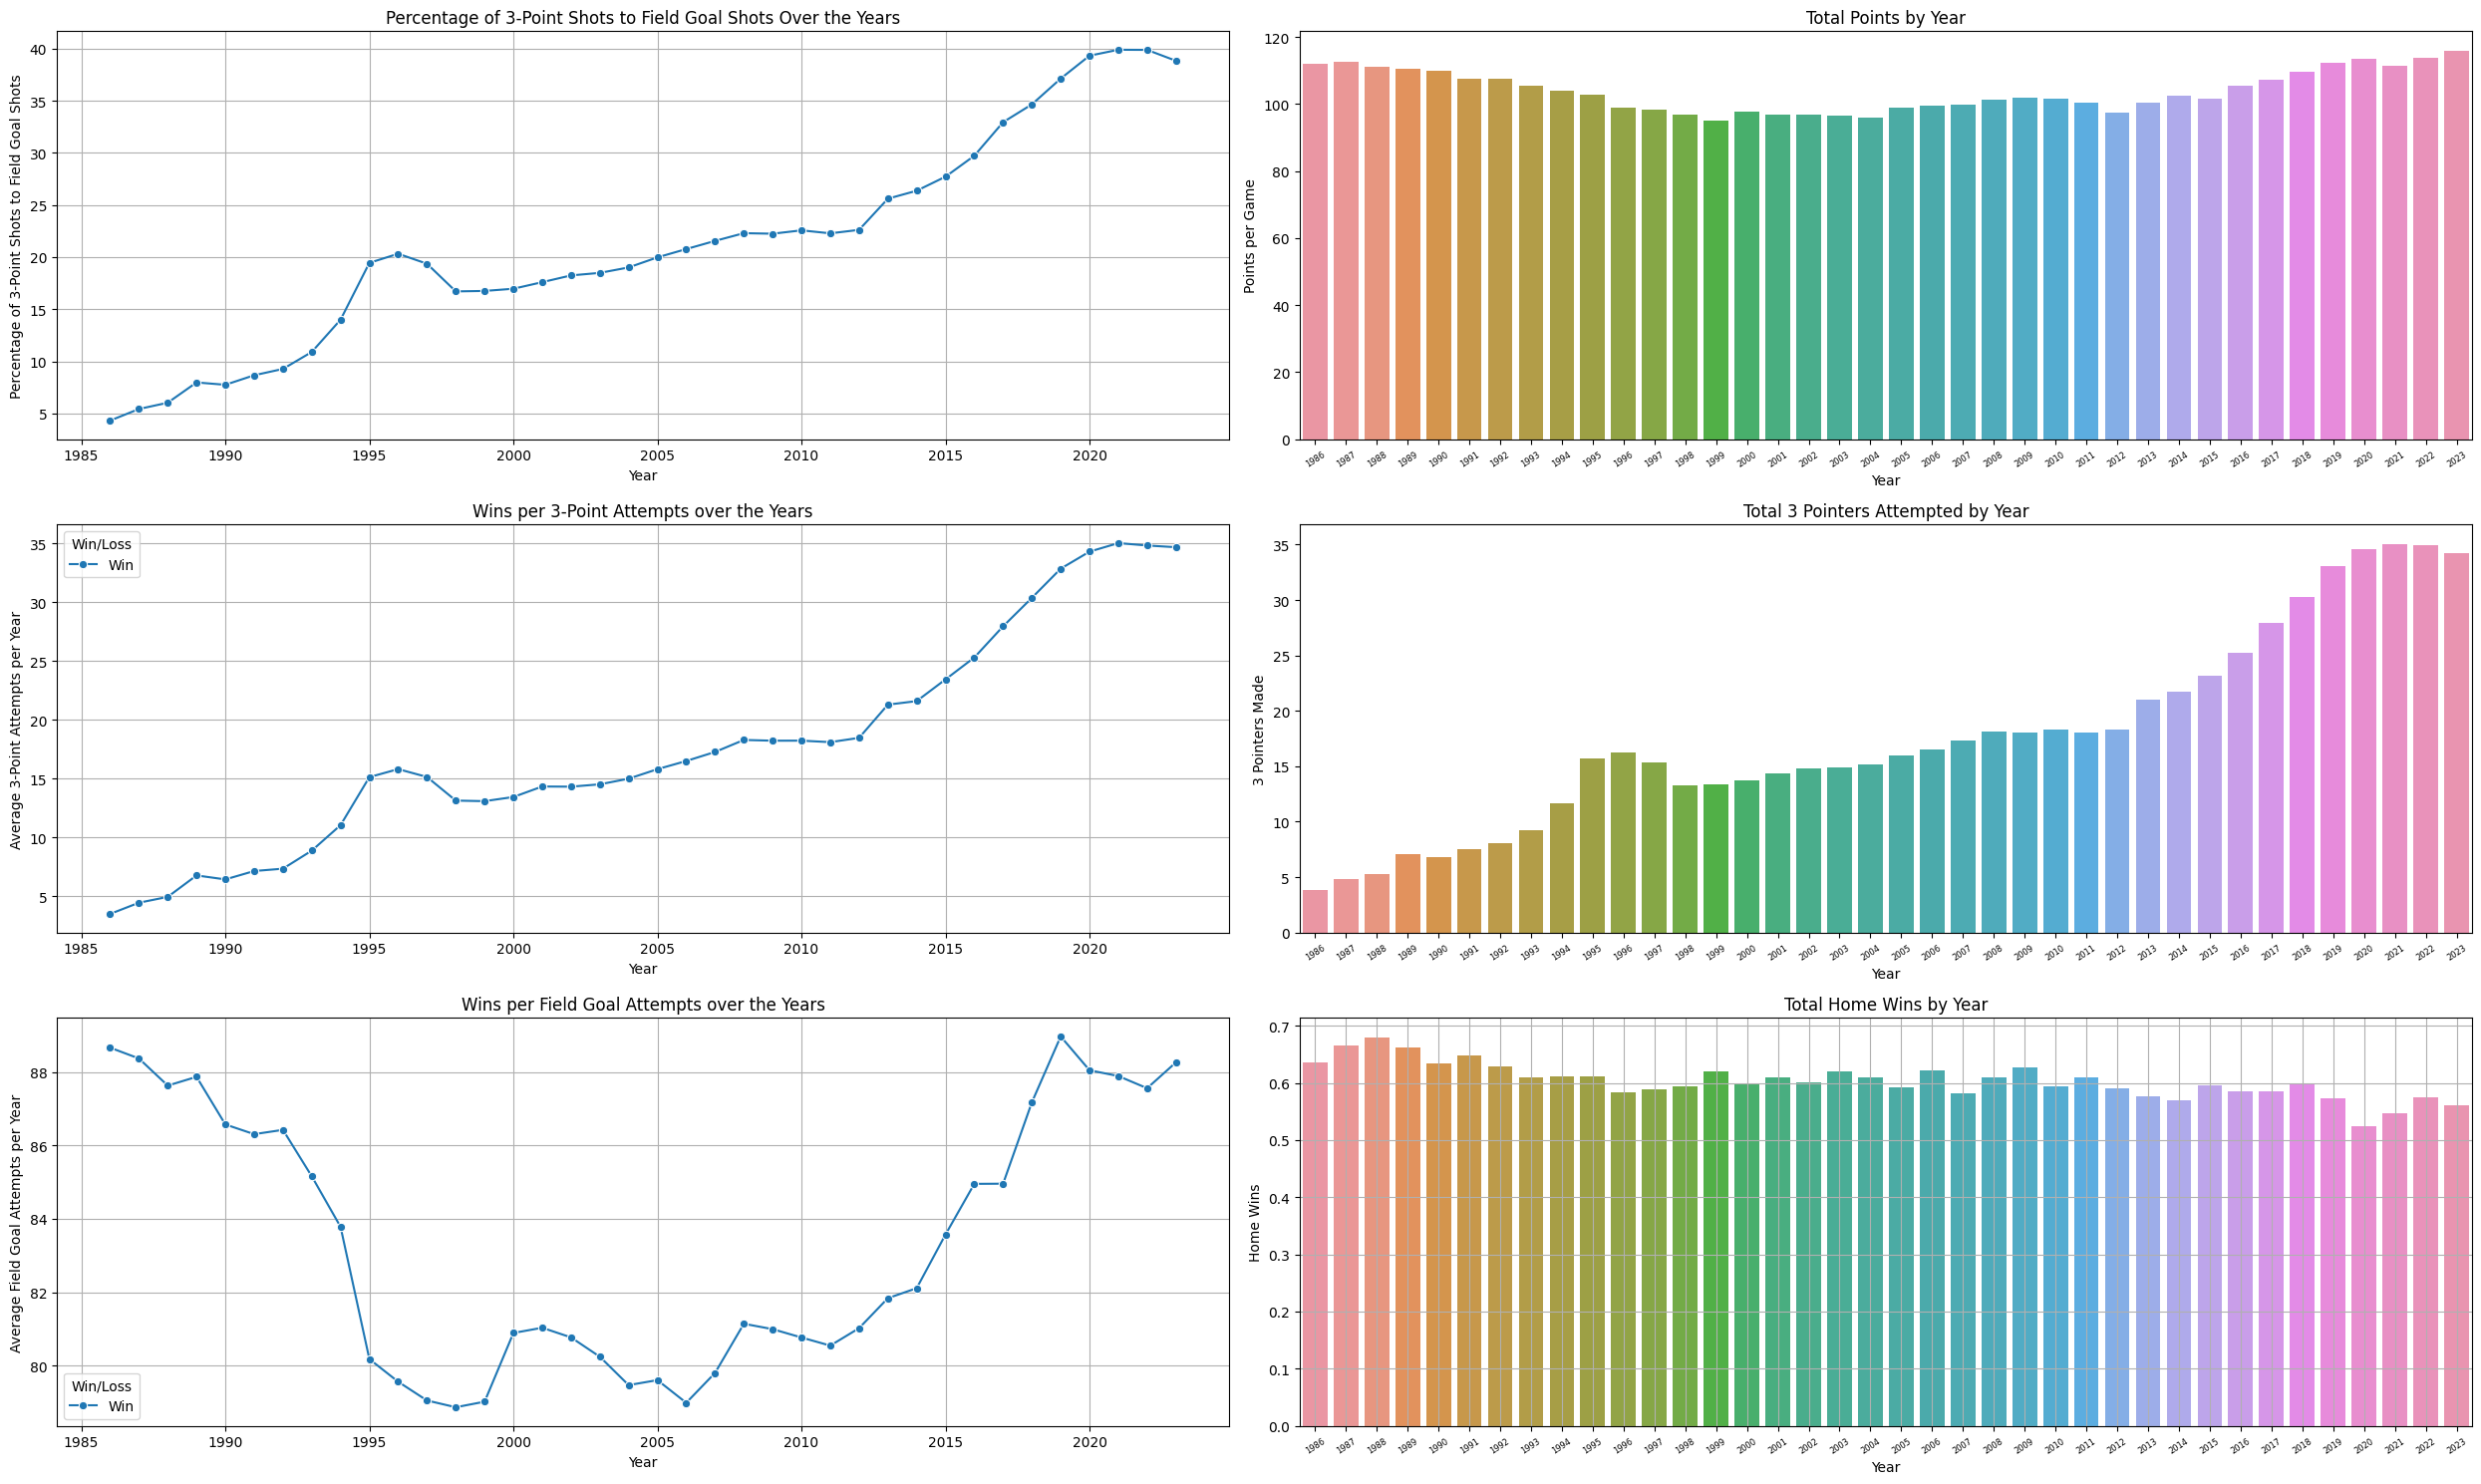

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a single figure with three subplots (3 row and 2 columns)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(25, 15))

# Grouping the data by 'year' and calculating the mean of 'fg3_pct_home' for each year
year_3pt_percent = df.groupby('year')['fg3_pct_home'].mean().reset_index()

# Grouping the data by 'wl_home' and 'year', and calculating the mean of 'fg3a_home' for each group
wins_3pta = df.groupby(['wl_home', 'year'])['fg3a_home'].mean().reset_index()

# Filtering the data for 'wl_home' where wins are 1 (win)
wins_data = wins_3pta[wins_3pta['wl_home'] == 1]

# Calculate the percentage of 3-point shots to field goal shots for each year
df['3pt_to_fg_percentage'] = (df['fg3a_home'] / df['fga_home']) * 100

# Grouping the data by 'year' and calculating the mean percentage for each year
year_3pt_to_fg_percentage = df.groupby('year')['3pt_to_fg_percentage'].mean().reset_index()

# Creating a line plot
sns.lineplot(data=year_3pt_to_fg_percentage, x='year', y='3pt_to_fg_percentage', marker='o', ax=axes[0,0])
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Percentage of 3-Point Shots to Field Goal Shots')
axes[0,0].set_title('Percentage of 3-Point Shots to Field Goal Shots Over the Years')
axes[0,0].grid(True)


# Grouping the data by 'wl_home' and 'year', and calculating the mean of 'fg3a_home' for each group
wins_3pta = df.groupby(['wl_home', 'year'])['fg3a_home'].mean().reset_index()

# Filtering the data for 'wl_home' where wins are 1 (win)
wins_data = wins_3pta[wins_3pta['wl_home'] == 1]

# Scatter plot for Wins per 3-Point Attempts over the Years (Plot on the second subplot)
sns.lineplot(data=wins_data, x='year', y='fg3a_home', hue='wl_home', marker='o', ax=axes[1,0])
axes[1,0].set_xlabel('Year')
axes[1,0].set_ylabel('Average 3-Point Attempts per Year')
axes[1,0].set_title('Wins per 3-Point Attempts over the Years')
axes[1,0].grid(True)
axes[1,0].legend(title='Win/Loss', labels=['Win'])

# Total points per year barplot (Plot on the third subplot)
sns.barplot(data=tot_pts, x='year', y='pts_home', ax=axes[0,1])
axes[0,1].set_title('Total Points by Year')
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('Points per Game')
axes[0,1].tick_params(axis='x', labelsize=6, rotation=33)

# Filtering 3pta year
year_3pta = df.groupby('year')['fg3a_home'].mean().sort_values(ascending=False).reset_index()

# Creating a 3 point attempt barplot
sns.barplot(data=year_3pta, x='year', y='fg3a_home', ax=axes[1,1])
axes[1,1].set_title('Total 3 Pointers Attempted by Year')
axes[1,1].set_xlabel('Year')
axes[1,1].set_ylabel('3 Pointers Made')
axes[1,1].tick_params(axis='x', labelsize=6, rotation=33)

# Filtering by wl_home per year
wl_home = df.groupby('year')['wl_home'].mean().sort_values(ascending=False).reset_index()

# Creating a Wins per year barplot
sns.barplot(data=wl_home, x='year', y='wl_home', ax=axes[2,1])
axes[2,1].set_title('Total Home Wins by Year')
axes[2,1].set_xlabel('Year')
axes[2,1].set_ylabel('Home Wins')
axes[2,1].tick_params(axis='x', labelsize=6, rotation=33)
axes[2,1].grid(True)


# Grouping the data by 'wl_home' and 'year', and calculating the mean of 'fg3a_home' for each group
wins_fga = df.groupby(['wl_home', 'year'])['fga_home'].mean().reset_index()

# Filtering the data for 'wl_home' where wins are 1 (win)
wins_data = wins_fga[wins_fga['wl_home'] == 1]

# Scatter plot for Wins per 3-Point Attempts over the Years (Plot on the second subplot)
sns.lineplot(data=wins_data, x='year', y='fga_home', hue='wl_home', marker='o', ax=axes[2,0])
axes[2,0].set_xlabel('Year')
axes[2,0].set_ylabel('Average Field Goal Attempts per Year')
axes[2,0].set_title('Wins per Field Goal Attempts over the Years')
axes[2,0].grid(True)
axes[2,0].legend(title='Win/Loss', labels=['Win'])

# Adjusting the layout to avoid overlapping titles
plt.tight_layout()

plt.show()

- As you can see from the graphs above, my initial prediction of more three pointers means more points is not fully accurate. Yes the three pointers over the years has increased substantially, but when the field goals per game took a dip so did points per game

- Another thing to note is that the three pointers has increased each year and leveled off around 2020 the three point percentage has slowly increased each year.

- One more thing is that the home win has decreased since 1987 by about 10%. Although I do not think this has any correlation on the amount of 3 pointers taken it is definately something to take note of.

- Another thing is the points per game has slowly increased since 1999, with the highest total points being in 2023 follwed up by 2022 and 2020.

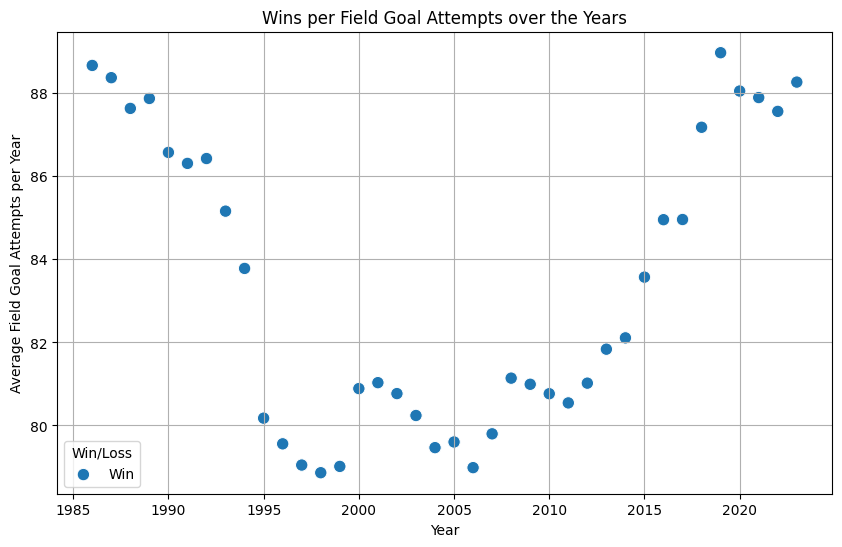

In [178]:
# Grouping the data by 'wl_home' and 'year', and calculating the mean of 'fg3a_home' for each group
wins_3pta = df.groupby(['wl_home', 'year'])['fga_home'].mean().reset_index()

# Filtering the data for 'wl_home' where wins are 1 (win)
wins_data = wins_3pta[wins_3pta['wl_home'] == 1]

# Creating the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=wins_data, x='year', y='fga_home', hue='wl_home', marker='o', s=80)
plt.xlabel('Year')
plt.ylabel('Average Field Goal Attempts per Year')
plt.title('Wins per Field Goal Attempts over the Years')
plt.grid(True)
plt.legend(title='Win/Loss', labels=['Win'])
plt.show()

As you can see from the plot above, in the games that teams have won their field goal attempts took a huge dip from the 1995 season to 2015 season. This could be because of a change in playstyle or a change in pace of the game.

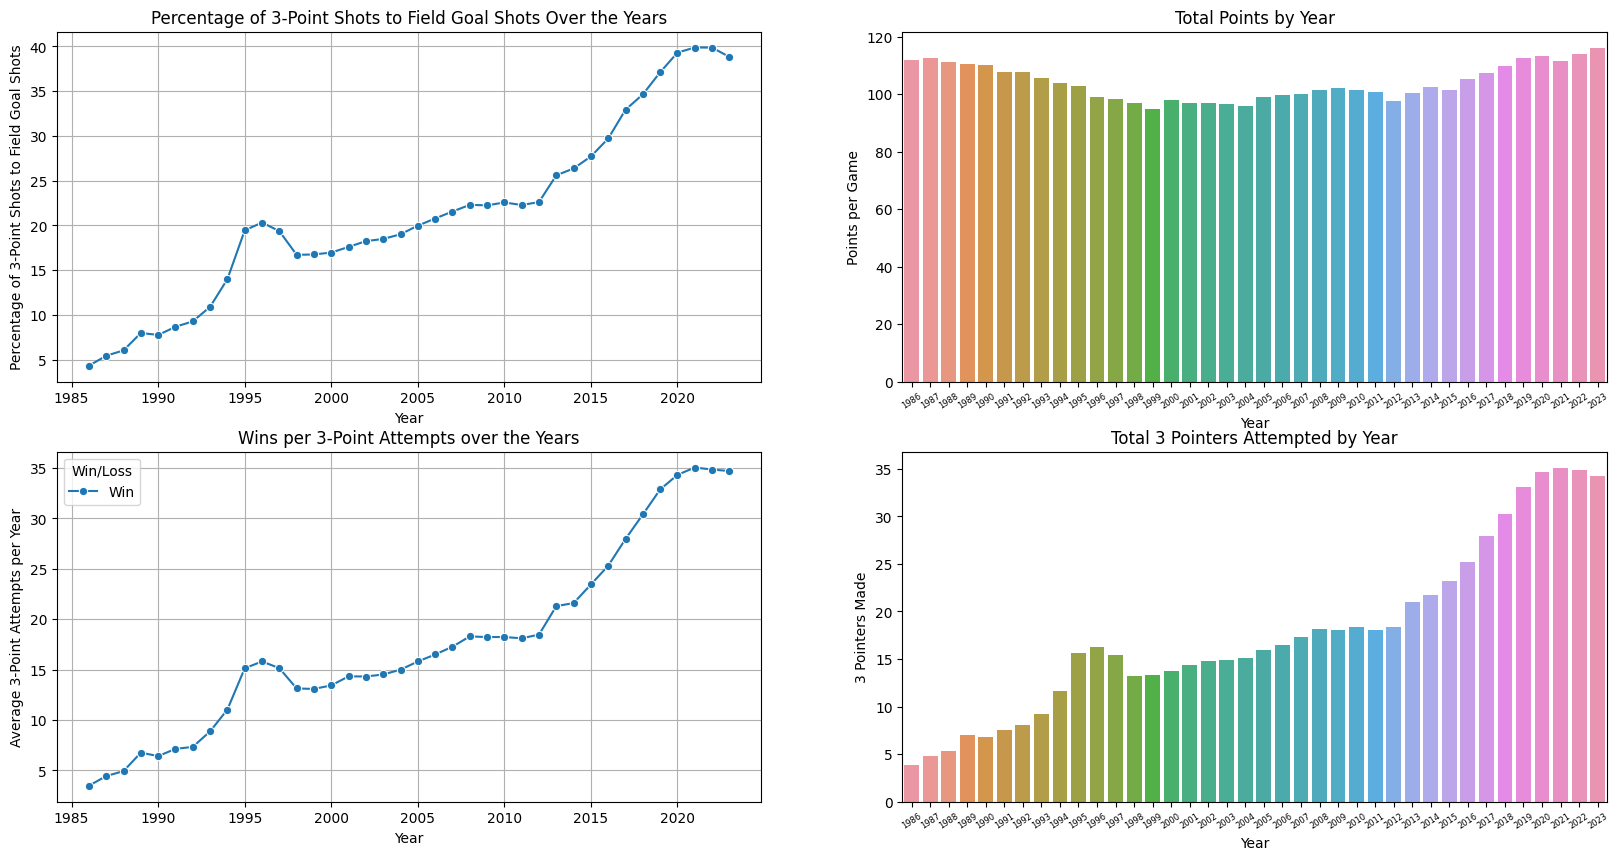

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a single figure with three subplots (1 row and 3 columns)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

# Grouping the data by 'year' and calculating the mean of 'fg3_pct_home' for each year
year_3pt_percent = df.groupby('year')['fg3_pct_home'].mean().reset_index()

# Grouping the data by 'wl_home' and 'year', and calculating the mean of 'fg3a_home' for each group
wins_3pta = df.groupby(['wl_home', 'year'])['fg3a_home'].mean().reset_index()

# Filtering the data for 'wl_home' where wins are 1 (win)
wins_data = wins_3pta[wins_3pta['wl_home'] == 1]

# Calculate the percentage of 3-point shots to field goal shots for each year
df['3pt_to_fg_percentage'] = (df['fg3a_home'] / df['fga_home']) * 100

# Grouping the data by 'year' and calculating the mean percentage for each year
year_3pt_to_fg_percentage = df.groupby('year')['3pt_to_fg_percentage'].mean().reset_index()

# Creating a line plot
sns.lineplot(data=year_3pt_to_fg_percentage, x='year', y='3pt_to_fg_percentage', marker='o', ax=axes[0,0])
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Percentage of 3-Point Shots to Field Goal Shots')
axes[0,0].set_title('Percentage of 3-Point Shots to Field Goal Shots Over the Years')
axes[0,0].grid(True)


# Grouping the data by 'wl_home' and 'year', and calculating the mean of 'fg3a_home' for each group
wins_3pta = df.groupby(['wl_home', 'year'])['fg3a_home'].mean().reset_index()

# Filtering the data for 'wl_home' where wins are 1 (win)
wins_data = wins_3pta[wins_3pta['wl_home'] == 1]

# Scatter plot for Wins per 3-Point Attempts over the Years (Plot on the second subplot)
sns.lineplot(data=wins_data, x='year', y='fg3a_home', hue='wl_home', marker='o', ax=axes[1,0])
axes[1,0].set_xlabel('Year')
axes[1,0].set_ylabel('Average 3-Point Attempts per Year')
axes[1,0].set_title('Wins per 3-Point Attempts over the Years')
axes[1,0].grid(True)
axes[1,0].legend(title='Win/Loss', labels=['Win'])

# Total points per year barplot (Plot on the third subplot)
sns.barplot(data=tot_pts, x='year', y='pts_home', ax=axes[0,1])
axes[0,1].set_title('Total Points by Year')
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('Points per Game')
axes[0,1].tick_params(axis='x', labelsize=6, rotation=33)

# Filtering 3pta year
year_3pta = df.groupby('year')['fg3a_home'].mean().sort_values(ascending=False).reset_index()

# Creating a 3 point attempt barplot
sns.barplot(data=year_3pta, x='year', y='fg3a_home', ax=axes[1,1])
axes[1,1].set_title('Total 3 Pointers Attempted by Year')
axes[1,1].set_xlabel('Year')
axes[1,1].set_ylabel('3 Pointers Made')
axes[1,1].tick_params(axis='x', labelsize=6, rotation=33)


As you can see from the graphs above, as the three pointers attempted have increased over the years so have the points, percentage of shots taken, and wins per 3 point shots taken.

### Transforming Train/Test Data

#### Importing Libraries

In [180]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


# model libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# classification metrics libraries
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Set global scikit-learn configuration
from sklearn import set_config

# Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

#### Identifying Features and Target

In [181]:
# Identifying the target and features
target = 'wl_home'

# Identifying Features
X = df.drop(columns=[target, 'wl_home'])

# Identifying Target
y = df[target]

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#### Preprocessing number columns

In [182]:
df.tail(1)

,wl_home,fgm_home,fga_home,fg_pct_home,fg3m_home,fg3a_home,fg3_pct_home,ftm_home,fta_home,ft_pct_home,oreb_home,dreb_home,reb_home,ast_home,stl_home,blk_home,tov_home,pf_home,pts_home,season_type,year,3pt_to_fg_percentage
game_id,,,,,,,,,,,,,,,,,,,,,,
42200405,1,38.0,84.0,0.452,5.0,28.0,0.179,13.0,23.0,0.565,11.0,46.0,57.0,21.0,6.0,7.0,15.0,13.0,94.0,Playoffs,2023,33.333333


In [183]:
# Assigning number columns
num_cols = X_train.select_dtypes('number').columns
print('Numeric Columns', num_cols)

# Instantiate Scaler
scaler = StandardScaler()

# Creating a pipeline
num_pipe = make_pipeline(scaler)

# Creating a number tuple
num_tuple = ('numeric', num_pipe, num_cols)
num_tuple

Numeric Columns Index(['fgm_home', 'fga_home', 'fg_pct_home', 'fg3m_home', 'fg3a_home',
       'fg3_pct_home', 'ftm_home', 'fta_home', 'ft_pct_home', 'oreb_home',
       'dreb_home', 'reb_home', 'ast_home', 'stl_home', 'blk_home', 'tov_home',
       'pf_home', 'pts_home', 'year', '3pt_to_fg_percentage'],
      dtype='object')


('numeric',
 Pipeline(steps=[('standardscaler', StandardScaler())]),
 Index(['fgm_home', 'fga_home', 'fg_pct_home', 'fg3m_home', 'fg3a_home',
        'fg3_pct_home', 'ftm_home', 'fta_home', 'ft_pct_home', 'oreb_home',
        'dreb_home', 'reb_home', 'ast_home', 'stl_home', 'blk_home', 'tov_home',
        'pf_home', 'pts_home', 'year', '3pt_to_fg_percentage'],
       dtype='object'))

#### Preprocessing categorical columns

In [184]:
# Selecting object columns
ohe_cols = X_train.select_dtypes('object').columns
print('OneHotEncoding Columns:', ohe_cols)

# OneHotEncoding Columns
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Creating a pipeline
ohe_pipe = make_pipeline(ohe_encoder)

# Creating a tuple
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
ohe_tuple

OneHotEncoding Columns: Index(['season_type'], dtype='object')


('categorical',
 Pipeline(steps=[('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['season_type'], dtype='object'))

#### Column Transformer

In [185]:
# Creating a column transformer
preprocessor = ColumnTransformer([num_tuple, ohe_tuple], verbose_feature_names_out=False)

preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 Index(['fgm_home', 'fga_home', 'fg_pct_home', 'fg3m_home', 'fg3a_home',
       'fg3_pct_home', 'ftm_home', 'fta_home', 'ft_pct_home', 'oreb_home',
       'dreb_home', 'reb_home', 'ast_home', 'stl_home', 'blk_home', 'tov_home',
       'pf_home', 'pts_home', 'year', '3pt_to_fg_percentage'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['season_type'], dtype='object'))],
                  verbose_feature_names_out=False)

In [186]:
# Fitting the column transformer onto the training data
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 Index(['fgm_home', 'fga_home', 'fg_pct_home', 'fg3m_home', 'fg3a_home',
       'fg3_pct_home', 'ftm_home', 'fta_home', 'ft_pct_home', 'oreb_home',
       'dreb_home', 'reb_home', 'ast_home', 'stl_home', 'blk_home', 'tov_home',
       'pf_home', 'pts_home', 'year', '3pt_to_fg_percentage'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['season_type'], dtype='object'))],
                  verbose_feature_names_out=False)

In [187]:
# Saving the transformed training data
X_train_processed = preprocessor.transform(X_train)

In [188]:
# Saving the transformed testing data
X_test_processed = preprocessor.transform(X_test)

## Models

### Custom Function

In [189]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, RocCurveDisplay
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):

  # Get the classification report
  report = classification_report(y_true, y_pred)

  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)

  ## CONFUSION MATRICES SUBPLOT
  fig, axes = plt.subplots(ncols=2, figsize=figsize)

  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray',colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")

  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap,colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  fig.tight_layout()
  plt.show()

  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict

def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):

  # Get predictions for training data
  y_train_pred = model.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()

  # Get predictions for test data
  y_test_pred = model.predict(X_test)

  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )

  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

### KNN Model

In [190]:
from sklearn.neighbors import KNeighborsClassifier

# instantiate default KNN
knn = KNeighborsClassifier()

# define KNN model pipeline
knn_pipe = make_pipeline(preprocessor, knn)

# fit the model on the training data
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['fgm_home', 'fga_home', 'fg_pct_home', 'fg3m_home', 'fg3a_home',
       'fg3_pct_home', 'ftm_home', 'fta_home', 'ft_pct_home', 'oreb_home',
       'dreb_home', 'reb_home', 'ast_home', 'stl_home', 'blk_home', 'tov_home',
       'pf_home', 'pts_home', 'year', '3pt_to_fg_percentage'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['season_type'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.79      0.82     13070
           1       0.87      0.91      0.89     20157

    accuracy                           0.86     33227
   macro avg       0.86      0.85      0.85     33227
weighted avg       0.86      0.86      0.86     33227



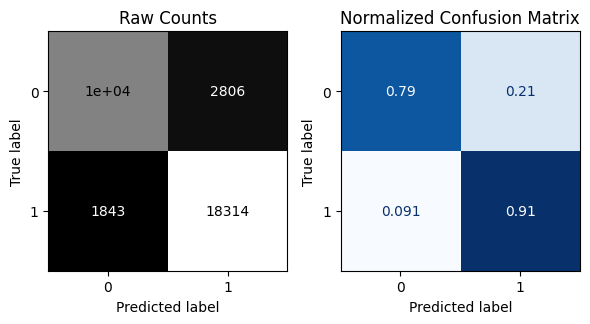


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.69      0.72      4500
           1       0.80      0.85      0.82      6576

    accuracy                           0.78     11076
   macro avg       0.78      0.77      0.77     11076
weighted avg       0.78      0.78      0.78     11076



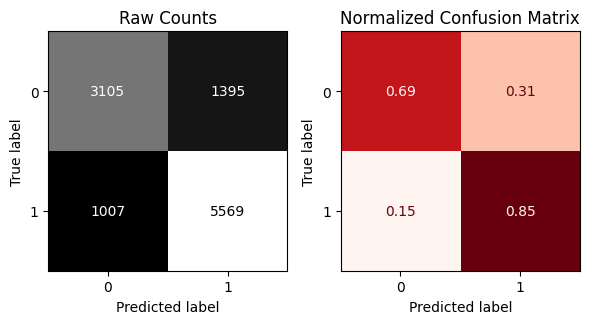

In [191]:
# obtain evaluation metrics using custom functions
evaluate_classification(knn_pipe, X_train, y_train, X_test, y_test)

#### Tuning

In [192]:
# making every other value from the range (odd values)
nneighbors_list = list(range(1, 51, 2))

# create a param grid
params = {'kneighborsclassifier__n_neighbors': nneighbors_list,
          'kneighborsclassifier__weights': ['distance','uniform']}

# instantiate gridsearch
knn_gs = GridSearchCV(knn_pipe, params, verbose=5, n_jobs=-1,
                  scoring='recall_macro')

# fit gs on training data
knn_gs.fit(X_train, y_train)

# creating value for best estimator
knn_best_est = knn_gs.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13070
           1       1.00      1.00      1.00     20157

    accuracy                           1.00     33227
   macro avg       1.00      1.00      1.00     33227
weighted avg       1.00      1.00      1.00     33227



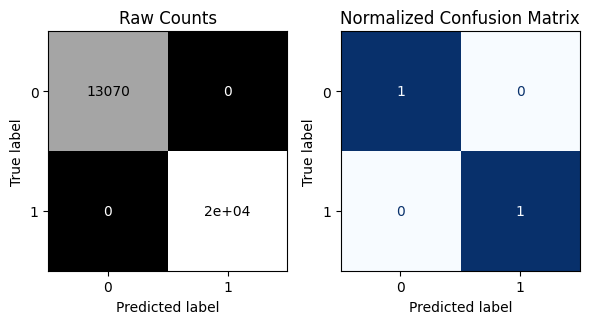


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.70      0.75      4500
           1       0.81      0.89      0.85      6576

    accuracy                           0.81     11076
   macro avg       0.81      0.79      0.80     11076
weighted avg       0.81      0.81      0.81     11076



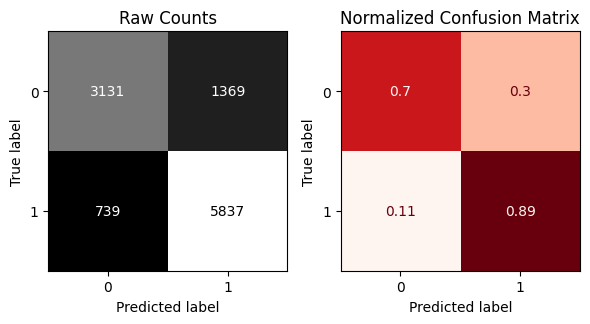

In [193]:
# obtain complete evaluation for best performing model
evaluate_classification(knn_best_est, X_train, y_train, X_test, y_test)

### Decision Tree Classifier

In [194]:
dt = DecisionTreeClassifier()

dt_pipe = make_pipeline(preprocessor, dt)

dt_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['fgm_home', 'fga_home', 'fg_pct_home', 'fg3m_home', 'fg3a_home',
       'fg3_pct_home', 'ftm_home', 'fta_home', 'ft_pct_home', 'oreb_home',
       'dreb_home', 'reb_home', 'ast_home', 'stl_home', 'blk_home', 'tov_home',
       'pf_home', 'pts_home', 'year', '3pt_to_fg_percentage'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['season_type'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13070
           1       1.00      1.00      1.00     20157

    accuracy                           1.00     33227
   macro avg       1.00      1.00      1.00     33227
weighted avg       1.00      1.00      1.00     33227



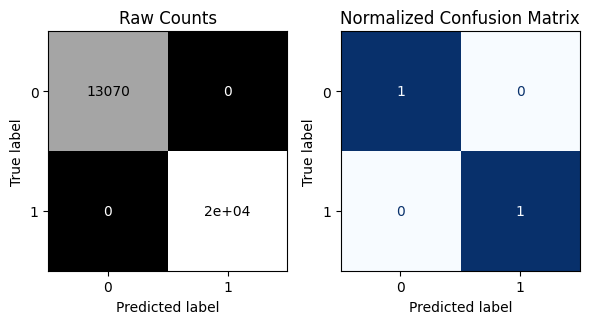


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.68      0.68      4500
           1       0.78      0.78      0.78      6576

    accuracy                           0.74     11076
   macro avg       0.73      0.73      0.73     11076
weighted avg       0.74      0.74      0.74     11076



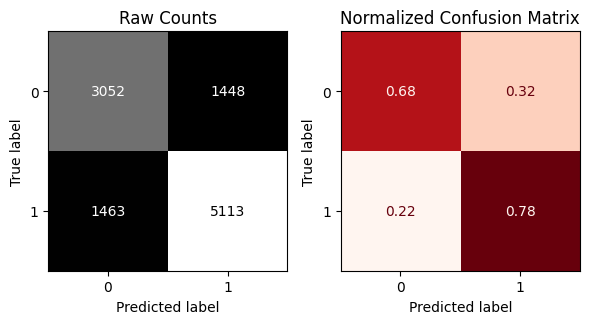

In [195]:
evaluate_classification(dt_pipe, X_train, y_train, X_test, y_test)

#### Tuning

In [196]:
# Define the hyperparameter grid for the DecisionTreeClassifier
param_grid = {
    'decisiontreeclassifier__criterion': ['gini', 'entropy'],
    'decisiontreeclassifier__max_depth': [None, 5, 10, 15, 20],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(dt_pipe, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.79      0.81     13070
           1       0.87      0.89      0.88     20157

    accuracy                           0.85     33227
   macro avg       0.85      0.84      0.84     33227
weighted avg       0.85      0.85      0.85     33227



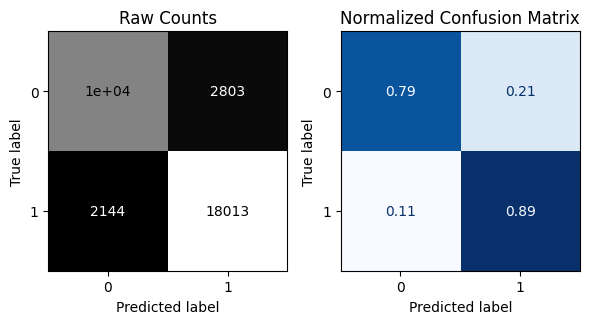


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.67      0.70      4500
           1       0.79      0.83      0.81      6576

    accuracy                           0.77     11076
   macro avg       0.76      0.75      0.75     11076
weighted avg       0.76      0.77      0.76     11076



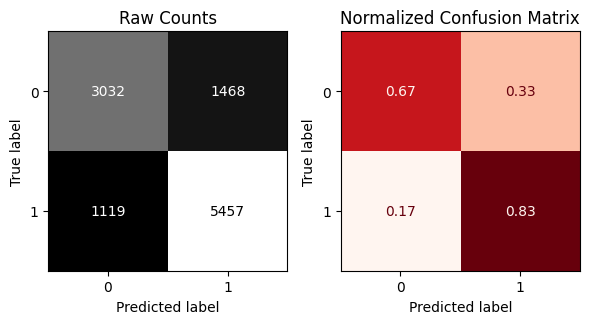

In [197]:
evaluate_classification(best_model, X_train, y_train, X_test, y_test)

### XGBoost

In [198]:
# Instantiate and fit gradient boosting classifier
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=250, max_depth=1)

xgb_pipe = make_pipeline(preprocessor, xgb)

xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['fgm_home', 'fga_home', 'fg_pct_home', 'fg3m_home', 'fg3a_home',
       'fg3_pct_home', 'ftm_home', 'fta_home', 'ft_pct_home', 'oreb_home',
       'dreb_home', 'reb_home', 'ast_home', 'stl_home', 'blk_home', 'tov_home',
       'pf_home', 'pts_home...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=1, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=250,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.77      0.80     13070
           1       0.86      0.89      0.87     20157

    accuracy                           0.84     33227
   macro avg       0.84      0.83      0.84     33227
weighted avg       0.84      0.84      0.84     33227



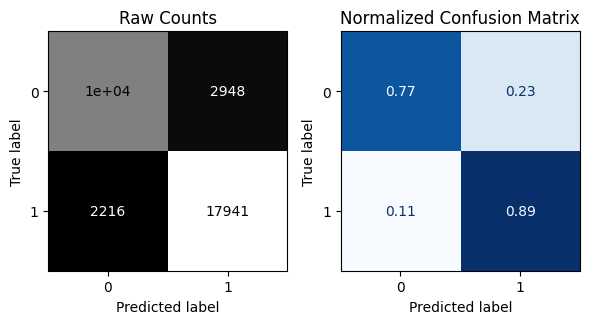


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      4500
           1       0.85      0.88      0.87      6576

    accuracy                           0.84     11076
   macro avg       0.84      0.83      0.83     11076
weighted avg       0.84      0.84      0.84     11076



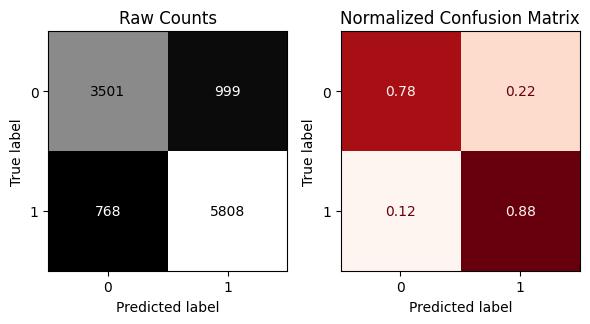

In [199]:
evaluate_classification(xgb_pipe, X_train, y_train, X_test, y_test)

### LightGMB

In [200]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()

lgbm_pipe = make_pipeline(preprocessor, lgbm)

lgbm_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['fgm_home', 'fga_home', 'fg_pct_home', 'fg3m_home', 'fg3a_home',
       'fg3_pct_home', 'ftm_home', 'fta_home', 'ft_pct_home', 'oreb_home',
       'dreb_home', 'reb_home', 'ast_home', 'stl_home', 'blk_home', 'tov_home',
       'pf_home', 'pts_home', 'year', '3pt_to_fg_percentage'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['season_type'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('lgbmclassifier', LGBMClassifier())])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.82      0.84     13070
           1       0.89      0.91      0.90     20157

    accuracy                           0.87     33227
   macro avg       0.87      0.86      0.87     33227
weighted avg       0.87      0.87      0.87     33227



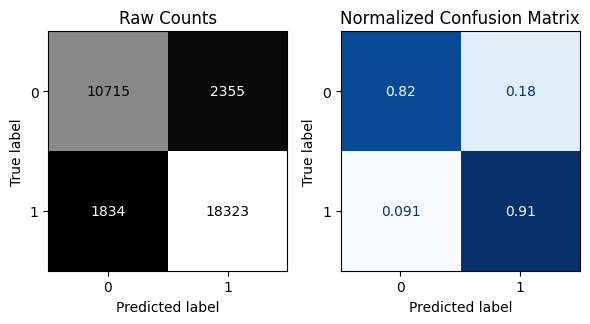


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      4500
           1       0.86      0.88      0.87      6576

    accuracy                           0.84     11076
   macro avg       0.84      0.83      0.83     11076
weighted avg       0.84      0.84      0.84     11076



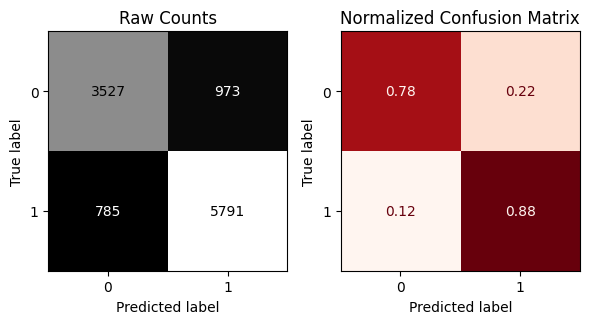

In [201]:
evaluate_classification(lgbm_pipe, X_train, y_train, X_test, y_test)

### Logistic Regression

In [202]:
# creating a logistic regression model
lr = LogisticRegression(random_state=42)

# creating the pipe
lr_pipe = make_pipeline(preprocessor, lr)

# fitting the pipe onto the training data
lr_pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['fgm_home', 'fga_home', 'fg_pct_home', 'fg3m_home', 'fg3a_home',
       'fg3_pct_home', 'ftm_home', 'fta_home', 'ft_pct_home', 'oreb_home',
       'dreb_home', 'reb_home', 'ast_home', 'stl_home', 'blk_home', 'tov_home',
       'pf_home', 'pts_home', 'year', '3pt_to_fg_percentage'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['season_type'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('logisticregression', LogisticRegression(random_state=42))])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.79      0.80     13070
           1       0.87      0.89      0.88     20157

    accuracy                           0.85     33227
   macro avg       0.84      0.84      0.84     33227
weighted avg       0.85      0.85      0.85     33227



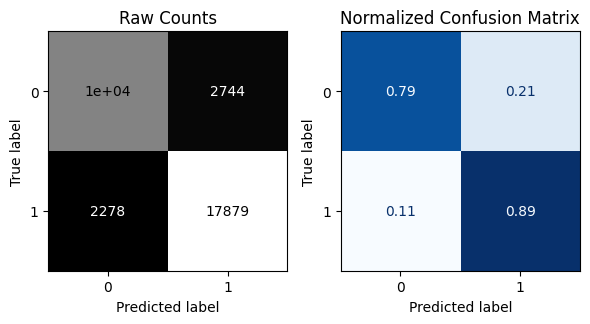


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      4500
           1       0.86      0.88      0.87      6576

    accuracy                           0.85     11076
   macro avg       0.84      0.84      0.84     11076
weighted avg       0.85      0.85      0.85     11076



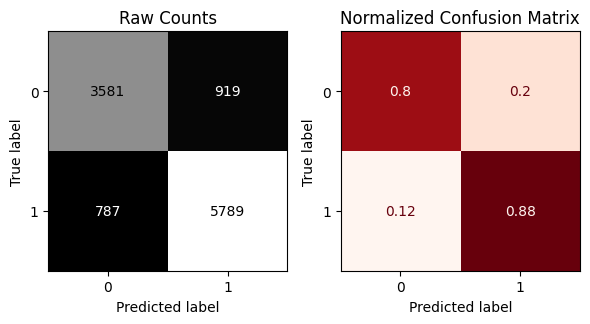

In [203]:
evaluate_classification(lr_pipe, X_train, y_train, X_test, y_test)

#### Tuning

In [204]:
# Create a dictionary of parameters
params = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [205]:
# Tune hyperparameters with GridSearchCV
lr_gs = GridSearchCV(lr_pipe, params)
lr_gs.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['fgm_home', 'fga_home', 'fg_pct_home', 'fg3m_home', 'fg3a_home',
       'fg3_pct_home', 'ftm_home', 'fta_home', 'ft_pct_home', 'oreb_home',
       'dreb_home', 'reb_home', 'ast_home', 'stl_home', 'blk_home', 'tov_ho...
       'pf_home', 'pts_home', 'year', '3pt_to_fg_percentage'],
      dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['season_type'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('logisticregression',
                                        LogisticRegression(random_state=42))]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                   1000]})

In [206]:
# setting best estimators to best_lr
best_lr = lr_gs.best_estimator_

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.79      0.80     13070
           1       0.87      0.89      0.88     20157

    accuracy                           0.85     33227
   macro avg       0.84      0.84      0.84     33227
weighted avg       0.85      0.85      0.85     33227



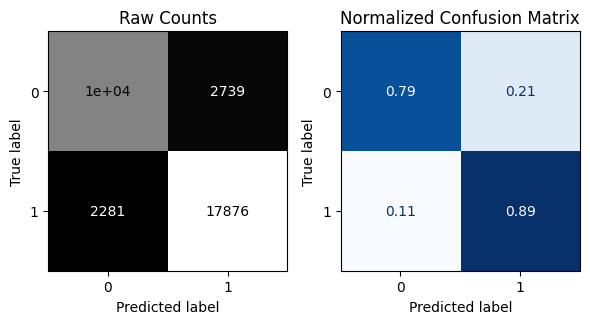


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      4500
           1       0.86      0.88      0.87      6576

    accuracy                           0.85     11076
   macro avg       0.84      0.84      0.84     11076
weighted avg       0.85      0.85      0.85     11076



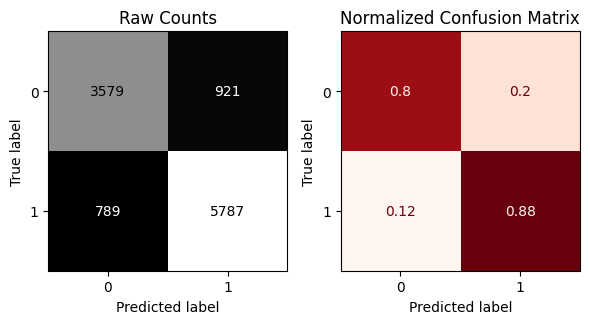

In [207]:
# evaluating the model
evaluate_classification(best_lr, X_train, y_train, X_test, y_test)